***
# *What types of films are currently doing the best at the box office and what are some actionable insights from that data that can be used when starting a new movie studio?*
***

# imports and initialization

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import cpi
import requests
import json
import math
import warnings
import time
import ast
import numpy as np

In [3]:
# uncomment this procedure call if the cpi library returns a warning about its
# data being out of date
#cpi.update()

Look at the list of files in the datasets directory.  It includes the original data files provided for the project from https://github.com/learn-co-students/dsc-mod-1-project-v2-1-onl01-dtsc-pt-012120

And files that were created during the analysis.

In [4]:
ls ./datasets

bom.movie_gross.csv*             imdb.title.principals.csv*
clean_tmdb_movies.csv            imdb.title.ratings.csv*
clean_tmdb_movies_df.csv         last_20_years_movie_budgets.csv
financials_with_genres.csv       rt.movie_info.tsv*
imdb.name.basics.csv*            rt.reviews.tsv*
imdb.title.akas.csv*             tmdb.movies.csv*
imdb.title.basics.csv*           tmdb_genres.csv
imdb.title.crew.csv*             tn.movie_budgets.csv*


# bom.movie_gross.csv

## Not Used

After reviewing all the provided data, and considering what could be acquired elsewhere, I decided not the include the data this file in my analysis at this time.

## Summary

Table with movie titles, a studio abbreviation, domestic gross, foreign gross and year.

There are 3387 movies, but 40% of them are missing their foreign_gross, plus a minor amount don't have a domestic gross.  At least some of the movies with no listed domestic gross did not have a domestic release.

## Columns:  
* title
* studio
* domestic_gross
* foreign_gross
* year

## EDA

In [5]:
bom_df = pd.read_csv('datasets/bom.movie_gross.csv')

In [6]:
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [7]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [8]:
# remove the commas from the data in the foreign_gross column and convert it to float
bom_df['foreign_gross'] = bom_df['foreign_gross'].str.replace(',', '')

bom_df['foreign_gross'] = bom_df['foreign_gross'].astype('float')

In [9]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null float64
year              3387 non-null int64
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


why are there NAN in the foreign gross column?

is it because there is no foreign gross or because there is no data?

there are also some rows with no domestic gross, why?

In [10]:
bom_df.describe()

,domestic_gross,foreign_gross,year
count,3.359000e+03,2.037000e+03,3387.000000
mean,2.874585e+07,7.487281e+07,2013.958075
std,6.698250e+07,1.374106e+08,2.478141
min,1.000000e+02,6.000000e+02,2010.000000
25%,1.200000e+05,3.700000e+06,2012.000000
50%,1.400000e+06,1.870000e+07,2014.000000
75%,2.790000e+07,7.490000e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


In [11]:
# first lets look at the data with no foreign_gross
bom_df[bom_df['foreign_gross'].isna()]

,title,studio,domestic_gross,foreign_gross,year
222,Flipped,WB,1800000.0,NaN,2010
254,The Polar Express (IMAX re-issue 2010),WB,673000.0,NaN,2010
267,Tiny Furniture,IFC,392000.0,NaN,2010
269,Grease (Sing-a-Long re-issue),Par.,366000.0,NaN,2010
280,Last Train Home,Zeit.,288000.0,NaN,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


doing a google search on Flipped, I found that there is an international box office amount of $2,534,781 which is greater than the domestic_gross

listed at https://www.the-numbers.com/movie/Flipped#tab=summary

so foreign_gross info is available just not in this dataset

is it worth trying to scrape it? 1350 is 40 percent of the dataset, so it might be worth the effort

the data at www.the-numbers.com is not easily scraped and is in fact prohibited, but they do offer an academic use dataset.  Maybe it could be useful.  After reviewing all the provided datasets, the I found that the one in the file tn.movie_budgets.csv is probably from The Numbers.

In [12]:
# next lets look at the movies with no domestic_gross and sort them
for_sorted_bom_df = bom_df[bom_df['domestic_gross'].isna()].sort_values(by=['foreign_gross'], ascending=False)

In [13]:
for_sorted_bom_df

,title,studio,domestic_gross,foreign_gross,year
2825,Secret Superstar,NaN,NaN,122000000.0,2017
2392,Finding Mr. Right 2,CL,NaN,114700000.0,2016
1975,Surprise - Journey To The West,AR,NaN,49600000.0,2015
2468,Solace,LGP,NaN,22400000.0,2016
1268,22 Bullets,Cdgm.,NaN,21300000.0,2013
871,Solomon Kane,RTWC,NaN,19600000.0,2012
1659,Jessabelle,LGF,NaN,7000000.0,2014
1308,Matru Ki Bijlee Ka Mandola,FIP,NaN,6000000.0,2013
928,The Tall Man,Imag.,NaN,5200000.0,2012
537,Force,FoxS,NaN,4800000.0,2011


the highest grossing movie on this list, Secret Superstar, did not have a domestic_gross

and neither did the 2nd, Finding Mr. Right 2.

# imdb.name.basics.csv

## Not Used

While the individuals that worked on specific projects, likely have analytical value,  it was not used in the analysis at this time.

## Summary

Table with names of people working in the movie industry, their primary professions and the titles they are known for.  It includes an id for that person, and movie id's that can that can be referenced in other IMDB tables.

## Columns
* nconst
* primary_name
* birth_year
* death_year
* primary_profession
* known_for_titles

## EDA

In [14]:
imdb_name_basics_df = pd.read_csv('datasets/imdb.name.basics.csv')

In [15]:
imdb_name_basics_df.head(10)

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
5,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445"
6,nm0063198,Bayou,NaN,NaN,actor,"tt6579724,tt0093116"
7,nm0063432,Stevie Be-Zet,NaN,NaN,"composer,soundtrack","tt3106212,tt0478239,tt0264917,tt1626606"
8,nm0063618,Jeff Beal,1963.0,NaN,"composer,music_department,soundtrack","tt0183659,tt2545118,tt0384766,tt1856010"
9,nm0063750,Lindsay Beamish,NaN,NaN,"actress,miscellaneous","tt0404826,tt0111756,tt0367027,tt1492842"


primary_profession and known_for_titles both contain lists.
* primary_profession contains a list of strings of job titles
* know_for_titles contains a list of presumably foreign keys

todo: split the primary_profession column in some way tbd

In [16]:
imdb_name_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
nconst                606648 non-null object
primary_name          606648 non-null object
birth_year            82736 non-null float64
death_year            6783 non-null float64
primary_profession    555308 non-null object
known_for_titles      576444 non-null object
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


look into the rows with actors

In [17]:
# first need to filter out the rows with NaN for primary_profession
no_pp_nan_imdb_name_basics_df = imdb_name_basics_df[imdb_name_basics_df['primary_profession'].notna()] 

In [18]:
# then filter looking for rows that contain a primary_profession of actor
no_pp_nan_imdb_name_basics_df[no_pp_nan_imdb_name_basics_df['primary_profession'].str.contains('actor')]

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
6,nm0063198,Bayou,NaN,NaN,actor,"tt6579724,tt0093116"
14,nm0066093,Ahmad Bedair,1945.0,NaN,"actor,miscellaneous","tt2290391,tt0424830,tt0297398,tt2338117"
15,nm0066163,Arnaud Bedouët,NaN,NaN,"actor,writer,director","tt1355327,tt1977735,tt0173525,tt1710520"
17,nm0066897,Mohammad-Ali Behboudi,1956.0,NaN,actor,"tt6836462,tt4591834,tt0375911,tt2101473"
...,...,...,...,...,...,...
606633,nm9985838,Anthony Simonetti,NaN,NaN,actor,tt8028908
606637,nm9989005,Jae-Hwan Kim,NaN,NaN,actor,NaN
606639,nm9989840,Mariya Shekaturova,NaN,NaN,actor,tt5953804
606641,nm9990047,Joseph Jackson,NaN,NaN,actor,NaN


birth_year and death_year are not relevant because there are so many missing values

The data on which people are involved in which movies, will probably have some analytical value.

# imdb.title.akas.csv

## Not Used

Because the IMDB data was not used in the analysis at this point, this data was excluded from the analysis.

## Summary

A table of the multiple names a movie may have around the world that all refer to a single id.

## Columns

* title_id 
  * is a shared key for the imdb tables
* ordering
  * an index relative to each title
* region
  * a country code
* language 
  * may be the dubbed language of the film or maybe subtitles
* attributes
  * extra notes, most don't have them
* is_original_title 
  * is either 0 or 1 (some entries that are the same as the original title are 0 for some reason)

## EDA

In [19]:
imdb_title_akas_df = pd.read_csv('datasets/imdb.title.akas.csv')

In [20]:
imdb_title_akas_df.head(20)

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0
5,tt0369610,15,Jurassic World,GR,NaN,imdbDisplay,NaN,0.0
6,tt0369610,16,Jurassic World,IT,NaN,imdbDisplay,NaN,0.0
7,tt0369610,17,Jurski svijet,HR,NaN,imdbDisplay,NaN,0.0
8,tt0369610,18,Olam ha'Yura,IL,he,imdbDisplay,NaN,0.0
9,tt0369610,19,Jurassic World: Mundo Jurásico,MX,NaN,imdbDisplay,NaN,0.0


In [21]:
imdb_title_akas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
title_id             331703 non-null object
ordering             331703 non-null int64
title                331703 non-null object
region               278410 non-null object
language             41715 non-null object
types                168447 non-null object
attributes           14925 non-null object
is_original_title    331678 non-null float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [22]:
imdb_title_akas_df.describe()

,ordering,is_original_title
count,331703.000000,331678.000000
mean,5.125872,0.134769
std,6.706664,0.341477
min,1.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,0.000000
75%,6.000000,0.000000
max,61.000000,1.000000


Look at an example movie to see how many different titles it has.

In [23]:
imdb_title_akas_df[imdb_title_akas_df['title_id'] == 'tt0369610']

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0
5,tt0369610,15,Jurassic World,GR,NaN,imdbDisplay,NaN,0.0
6,tt0369610,16,Jurassic World,IT,NaN,imdbDisplay,NaN,0.0
7,tt0369610,17,Jurski svijet,HR,NaN,imdbDisplay,NaN,0.0
8,tt0369610,18,Olam ha'Yura,IL,he,imdbDisplay,NaN,0.0
9,tt0369610,19,Jurassic World: Mundo Jurásico,MX,NaN,imdbDisplay,NaN,0.0


# imdb.title.basics.csv

## Not Used

While this table have data that would be good to use for the analysis, runtime and genres, the genre information was acquired elsewhere and runtime was not included in the analysis at this point.

## Summary

A table with movie id, two titles, release year, length and **genres**.

## columns
* tconst
  * the title key for the imdb tables
* primary_title 
  * ( there are 14,504 rows where the primary_title != the original_title)
* original_title
* start_year 
  * (presumably the release year)
* runtime_minutes
  * 31,739 NaN values
* genres
  * a list of genres ordered alphabetically, not by weight

## EDA

In [24]:
imdb_title_basics_df = pd.read_csv('datasets/imdb.title.basics.csv')

In [25]:
imdb_title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [26]:
imdb_title_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [27]:
imdb_title_basics_df.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


Look at how many rows do not have a runtime.

In [28]:
imdb_title_basics_df[imdb_title_basics_df['runtime_minutes'].isna()]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
16,tt0187902,How Huang Fei-hong Rescued the Orphan from the...,How Huang Fei-hong Rescued the Orphan from the...,2011,NaN,NaN
21,tt0250404,Godfather,Godfather,2012,NaN,"Crime,Drama"
...,...,...,...,...,...,...
146131,tt9915790,Bobbyr Bondhura,Bobbyr Bondhura,2019,NaN,Family
146138,tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War"
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy


Look at how many movies have a different primary title from its original title.

In [29]:
imdb_title_basics_df[imdb_title_basics_df['primary_title'] != imdb_title_basics_df['original_title']]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
11,tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,History
13,tt0162942,Children of the Green Dragon,A zöld sárkány gyermekei,2010,89.0,Drama
15,tt0176694,The Tragedy of Man,Az ember tragédiája,2011,160.0,"Animation,Drama,History"
...,...,...,...,...,...,...
146026,tt9899938,Journey of the Sky Goddess,Kibaiyanse! Watashi,2019,116.0,"Comedy,Drama"
146028,tt9900060,Lupin the Third: Fujiko Mine's Lie,Lupin the IIIrd: Mine Fujiko no Uso,2019,NaN,"Adventure,Crime,Drama"
146037,tt9900688,Big Three Dragons,Da San Yuan,2019,111.0,Comedy
146121,tt9914254,A Cherry Tale,Kirsebæreventyret,2019,85.0,Documentary


In [30]:
imdb_title_basics_df[imdb_title_basics_df['genres'].isna()]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
16,tt0187902,How Huang Fei-hong Rescued the Orphan from the...,How Huang Fei-hong Rescued the Orphan from the...,2011,NaN,NaN
22,tt0253093,Gangavataran,Gangavataran,2018,134.0,NaN
35,tt0306058,Second Coming,Second Coming,2012,95.0,NaN
40,tt0326592,The Overnight,The Overnight,2010,88.0,NaN
44,tt0330811,Regret Not Speaking,Regret Not Speaking,2011,NaN,NaN
...,...,...,...,...,...,...
146088,tt9907396,Footloose in the Cotswolds - Part 1,Footloose in the Cotswolds - Part 1,2016,118.0,NaN
146089,tt9907608,Footloose in the Cotswolds - Part 2,Footloose in the Cotswolds - Part 2,2016,102.0,NaN
146107,tt9910922,Doctor Who Augmented Reality: Times Magazine,Doctor Who Augmented Reality: Times Magazine,2013,NaN,NaN
146129,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN


Genre is going to be an attribute we look at so movies with no genres listed should be dropped

In [31]:
imdb_title_year_genre = imdb_title_basics_df[imdb_title_basics_df['genres'].notna()]
imdb_title_year_genre

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146138,tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War"
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy


In [32]:
imdb_title_year_genre['tconst'].nunique()

140736

# imdb.title.crew.csv

## Not Used

The director and writers of movies was not included in the analysis at this time, but would be good to include in follow up analysis.

## Summary

A table with all the directors and writers for movies.

## Columns
* tconst
* directors
  * can be single entry, list, or NaN
* writers
  * can be single entry, list, or NaN

## EDA

In [33]:
imdb_title_crew_df = pd.read_csv('datasets/imdb.title.crew.csv')

In [34]:
imdb_title_crew_df.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [35]:
imdb_title_crew_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
tconst       146144 non-null object
directors    140417 non-null object
writers      110261 non-null object
dtypes: object(3)
memory usage: 3.3+ MB


# imdb.title.principals.csv

## Not Used

The job data in this CSV file was not used in the analysis at this time, but should be considered for inclusion in follow up analysis. 

## Summary

A table of the principals on a film with the actors given their character names.  Everyone's actual names must be retrieved from imdb_name_basics_df and the film they are working on must be retrieved from imdb_title_basics_df.

## Columns
* tconst
* ordering
* nconst
* category
* job
  * mostly NaN
  * appear to be additional info for category, although there are plenty where both category and job are producer
* characters

## EDA

In [36]:
imdb_title_principals_df = pd.read_csv('datasets/imdb.title.principals.csv')

In [37]:
imdb_title_principals_df.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [38]:
imdb_title_principals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
tconst        1028186 non-null object
ordering      1028186 non-null int64
nconst        1028186 non-null object
category      1028186 non-null object
job           177684 non-null object
characters    393360 non-null object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


Look at the value counts of the category column

In [39]:
imdb_title_principals_df['category'].value_counts()

actor                  256718
director               146393
actress                146208
producer               113724
cinematographer         80091
composer                77063
writer                  74357
self                    65424
editor                  55512
production_designer      9373
archive_footage          3307
archive_sound              16
Name: category, dtype: int64

Look at the value counts of the data that has a category, but not a job.

In [40]:
imdb_title_principals_df[imdb_title_principals_df['job'].notna()]['category'].value_counts()

producer               113724
writer                  45494
director                 7504
cinematographer          7392
composer                 2003
editor                   1452
production_designer       115
Name: category, dtype: int64

# imdb.title.ratings.csv

## Not Used

Rating information was not used in the analysis at this time, but could be included in follow up analysis.

## Summary

An average rating and number of ratings for each movie.

## Columns
* tconst
* averagerating
* numvotes

## EDA

In [41]:
imdb_title_ratings_df = pd.read_csv('datasets/imdb.title.ratings.csv')

In [42]:
imdb_title_ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [43]:
imdb_title_ratings_df.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [44]:
# what is the movie with the maximum votes (a major outlier)
imdb_title_ratings_df.iloc[imdb_title_ratings_df['numvotes'].idxmax()]

tconst           tt1375666
averagerating          8.8
numvotes           1841066
Name: 63498, dtype: object

In [45]:
# look up tconst in imdb_title_basics_df
imdb_title_basics_df[imdb_title_basics_df['tconst'] == 'tt1375666']

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
7066,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi"


# rt.movie_info.tsv

## Not Used

The MPAA ratings and other movie data should be considered for follow up analysis, but was not included at this time.

## Summary

Table with a lot of movie info, but no movie names and no other table to refer to.  

Independent of actual movies, the release date, box office income and rating are important information.

## Columns
* id
* synopsis
* rating
* genre
* director
* writer
* theater_date
* dvd_date
* currency
  * the currency for the value in box_office
  * 340 are \\$ and the rest are Nan, presumably they are all in \\$
* box_office
* runtime
  * a string at least containing the word minutes
* studio

## EDA

In [46]:
rt_movie_info_df = pd.read_csv('datasets/rt.movie_info.tsv', sep='\t')

In [47]:
rt_movie_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [48]:
rt_movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
id              1560 non-null int64
synopsis        1498 non-null object
rating          1557 non-null object
genre           1552 non-null object
director        1361 non-null object
writer          1111 non-null object
theater_date    1201 non-null object
dvd_date        1201 non-null object
currency        340 non-null object
box_office      340 non-null object
runtime         1530 non-null object
studio          494 non-null object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


Look at how many of the rows have a value in the currency column vs. how many are NaN

In [49]:
rt_movie_info_df['currency'].value_counts(dropna=False)

NaN    1220
$       340
Name: currency, dtype: int64

# rt.reviews.tsv

## Not Used

The movie review data should be considered for follow up analysis, but was not included at this time.

## Summary

A table with movie reviews, but no way to attribute them to a particular movie.

## Columns
* id
  * foreign_key identifying the movie in rt_movie_info_df
* review
* rating
  * may by NaN
* fresh
  * boolean type value either fresh(good) or rotten(bad)
* critic
* top_critic
  * boolean type value of 0 and 1, with 1 being a top critic
* publisher
* date

## EDA

In [50]:
rt_reviews_df = pd.read_csv('datasets/rt.reviews.tsv', sep='\t', encoding ='latin1')

In [51]:
rt_reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [52]:
rt_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
id            54432 non-null int64
review        48869 non-null object
rating        40915 non-null object
fresh         54432 non-null object
critic        51710 non-null object
top_critic    54432 non-null int64
publisher     54123 non-null object
date          54432 non-null object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


Look at the number of fresh vs rotten movies in the dataset

In [53]:
rt_reviews_df['fresh'].value_counts(normalize=True, dropna=False)

fresh     0.606904
rotten    0.393096
Name: fresh, dtype: float64

It seems relevant that there is a 60/40 split between good and bad movies in this dataset

Look at the number of top critics vs other critics.  I'm assuming that 1 is for top critic and 0 is not.

In [54]:
rt_reviews_df['top_critic'].value_counts(normalize=True, dropna=False)

0    0.759406
1    0.240594
Name: top_critic, dtype: float64

It makes sense that there are only ~24% top critics, although I might have assumed that number would have been even lower.

# The Movie Database (tmdb.movies.csv)

## Used

The movie title and genre ids were used in the current analysis.

## Summary

A table with movie titles, genre data, release_date, and review data.

## Columns
* Unnamed:
  * probably a residual index
* genre_ids
  * a list of ids referring to some other table that will be acquired using an API
* id
  * the movie id
* original_title
* popularity
  * ranges from 0.6 to 80.7
  * a number that changes daily and based on multiple attributes https://developers.themoviedb.org/3/getting-started/popularity
* release_date
* title
* vote_average
* vote_count

## EDA

### Read In The Data

In [55]:
tmdb_movies_df = pd.read_csv('datasets/tmdb.movies.csv')

### Initial Examination of the Data

In [56]:
tmdb_movies_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [57]:
tmdb_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
Unnamed: 0           26517 non-null int64
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [58]:
tmdb_movies_df.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


In [59]:
tmdb_movies_df['original_title'].nunique()

24835

There are 24,835 unique titles out of 26,517 movies in this dataset.

### Clean the Data

Create a copy of the dataframe for cleaning

In [60]:
clean_tmdb_movies_df = tmdb_movies_df.copy(deep=True)

Convert release date from a string to a date

In [61]:
clean_tmdb_movies_df['release_date'] = pd.to_datetime(clean_tmdb_movies_df['release_date'])

Add a column for release_year

In [62]:
clean_tmdb_movies_df['release_year'] = clean_tmdb_movies_df['release_date'].map(lambda x: x.year)

Drop all the rows that have a release_year older than 2000

This analysis will only be considering movies from 2000 to 2019 because of the social and technological changes that have occurred since then; namely the expansion of the use of the internet, streaming, and the adoption of smart devices that allow constant access to entertainment, all of which contribute to how people spend there time consuming entertainment.

In [63]:
clean_tmdb_movies_df = clean_tmdb_movies_df[clean_tmdb_movies_df['release_year'] >= 2000]

review the updated dataframe

In [64]:
clean_tmdb_movies_df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_year
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010
5,5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,2010
...,...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1,2018
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,2018
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,2018
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,2018


review the number of remaining unique movie titles

In [65]:
clean_tmdb_movies_df['title'].nunique()

24595

Save the cleaned data to a csv file so that it can be loaded in Get_Missing_Genres_TMDB.ipynb when getting genre data using an API

In [66]:
clean_tmdb_movies_df.to_csv(r'datasets/clean_tmdb_movies.csv')

# Movie Budgets (the numbers) tn.movie_budgets.csv

## Used

The financial data in this dataset was used in the current analysis to determine which movies did the best financially at the box office.

## Summary

A table with movie titles, production budgets and gross profit/income.

## Columns
* id (can be ignored)
* release_date
* movie
* production_budget
* domestic_gross
* worldwide_gross

## EDA

### import the dataset

In [67]:
tn_movie_budgets_df = pd.read_csv('datasets/tn.movie_budgets.csv')

###  Initial examination of data

In [68]:
tn_movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [69]:
tn_movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


None of the data cells contain null objects.  Although some may contain invalid data that may be discovered during the cleaning process.

### Clean the data

#### convert production_budget, domestic_gross, worldwide_gross to int

These values are currently strings and need to be converted to int's for ease of analysis

In [70]:
# define a list of the relevent columns
cols = ['production_budget', 'domestic_gross', 'worldwide_gross']

# get rid of the dollar signs
clean_tn_movie_budgets_df = tn_movie_budgets_df.apply(
    lambda x: x.str.replace('$', '') if x.name in cols else x)

In [71]:
# get rid of the commas
clean_tn_movie_budgets_df = clean_tn_movie_budgets_df.apply(
    lambda x: x.str.replace(',', '') if x.name in cols else x)

In [72]:
# convert to int
clean_tn_movie_budgets_df[cols] = clean_tn_movie_budgets_df[cols].apply(pd.to_numeric, errors='coerce')

Review the dataframe now that the numbers are ints

In [73]:
clean_tn_movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [74]:
clean_tn_movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null int64
domestic_gross       5782 non-null int64
worldwide_gross      5782 non-null int64
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


In [75]:
clean_tn_movie_budgets_df.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


#### Look for missing data

Look for movies with no income

In [76]:
clean_tn_movie_budgets_df[clean_tn_movie_budgets_df['worldwide_gross'] == 0]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
194,95,"Dec 31, 2020",Moonfall,150000000,0,0
479,80,"Dec 13, 2017",Bright,90000000,0,0
480,81,"Dec 31, 2019",Army of the Dead,90000000,0,0
535,36,"Feb 21, 2020",Call of the Wild,82000000,0,0
670,71,"Aug 30, 2019",PLAYMOBIL,75000000,0,0
...,...,...,...,...,...,...
5761,62,"Dec 31, 2014",Stories of Our Lives,15000,0,0
5764,65,"Dec 31, 2007",Tin Can Man,12000,0,0
5771,72,"May 19, 2015",Family Motocross,10000,0,0
5777,78,"Dec 31, 2018",Red 11,7000,0,0


**There are 367 movies with a budget but no income**

That is 6% of the dataset.  Those rows should be dropped, because they can't tell us about income or profits and in some cases the movies haven't been released yet.

drop the rows with no income

In [77]:
clean_tn_movie_budgets_df = clean_tn_movie_budgets_df[clean_tn_movie_budgets_df['worldwide_gross'] != 0]
clean_tn_movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5415 entries, 0 to 5781
Data columns (total 6 columns):
id                   5415 non-null int64
release_date         5415 non-null object
movie                5415 non-null object
production_budget    5415 non-null int64
domestic_gross       5415 non-null int64
worldwide_gross      5415 non-null int64
dtypes: int64(4), object(2)
memory usage: 296.1+ KB


Look for movies with no production budget

In [78]:
clean_tn_movie_budgets_df[clean_tn_movie_budgets_df['production_budget'] == 0]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross


All the movies have a production budget

#### Convert the release_date column to datetime

release date is a string so it will need converted to a "datetime" to for sorting

In [79]:
clean_tn_movie_budgets_df['release_date'] = pd.to_datetime(clean_tn_movie_budgets_df['release_date'])

#### sort the dataframe by release date to review the head and tail of the dataset

In [80]:
clean_tn_movie_budgets_df = clean_tn_movie_budgets_df.sort_values(by=['release_date'])

In [81]:
clean_tn_movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5677,78,1915-02-08,The Birth of a Nation,110000,10000000,11000000
5614,15,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
5683,84,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
5606,7,1925-11-19,The Big Parade,245000,11000000,22000000
4569,70,1925-12-30,Ben-Hur: A Tale of the Christ,3900000,9000000,9000000


In [82]:
clean_tn_movie_budgets_df.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
580,81,2019-06-07,The Secret Life of Pets 2,80000000,63795655,113351496
1997,98,2019-06-14,Shaft,30000000,600000,600000
341,42,2019-06-14,Men in Black: International,110000000,3100000,3100000
1538,39,2019-06-21,Kursk,40000000,0,4212799


The movie release dates range from 1915 to June 21, 2019.  The most recent movies have lower than expected gross profits, and probably contain data only up to 6/21/19, and will be dropped later in the cleaning process.

#### Adjust for Inflation
Add new columns with inflation adjusted values for production_budget, domestic_gross and worldwide_gross

In [83]:
# add a column with release year, whose value can be referenced when adjusting for inflation
clean_tn_movie_budgets_df['release_year'] = clean_tn_movie_budgets_df['release_date'].map(lambda x: x.year)

# review the dataframe
clean_tn_movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
5677,78,1915-02-08,The Birth of a Nation,110000,10000000,11000000,1915
5614,15,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1916
5683,84,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
5606,7,1925-11-19,The Big Parade,245000,11000000,22000000,1925
4569,70,1925-12-30,Ben-Hur: A Tale of the Christ,3900000,9000000,9000000,1925


Add new inflation adjusted columns to the dataframe using the prefix real_

In [84]:
def inflate_column(data, column):
    """ Return an inflation adjusted series 
    
    Keyword arguments:
    data -- a dataframe which includes at least two columns, one of which is 
            release_year, the other indicated by the column argument
    column -- the column of data to have its values adjusted for inflation
    
    """
    return data.apply(lambda x: cpi.inflate(x[column], x.release_year), axis=1)

In [85]:
# adjust the production budget
clean_tn_movie_budgets_df['real_production_budget'] = inflate_column(clean_tn_movie_budgets_df, 
                                                                     'production_budget')

# adjust the domestic gross
clean_tn_movie_budgets_df['real_domestic_gross'] = inflate_column(clean_tn_movie_budgets_df, 
                                                                  'domestic_gross')

#adjust the worldwide gross
clean_tn_movie_budgets_df['real_worldwide_gross'] = inflate_column(clean_tn_movie_budgets_df, 
                                                                   'worldwide_gross')

In [86]:
# review the dataframe
clean_tn_movie_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,real_production_budget,real_domestic_gross,real_worldwide_gross
5677,78,1915-02-08,The Birth of a Nation,110000,10000000,11000000,1915,2.784383e+06,2.531257e+08,2.784383e+08
5614,15,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1916,4.690954e+06,1.876382e+08,1.876382e+08
5683,84,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920,1.278285e+06,3.834855e+07,3.834855e+07
5606,7,1925-11-19,The Big Parade,245000,11000000,22000000,1925,3.579198e+06,1.606987e+08,3.213974e+08
4569,70,1925-12-30,Ben-Hur: A Tale of the Christ,3900000,9000000,9000000,1925,5.697499e+07,1.314807e+08,1.314807e+08
...,...,...,...,...,...,...,...,...,...,...
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,3.500000e+08,4.276235e+07,1.497624e+08
580,81,2019-06-07,The Secret Life of Pets 2,80000000,63795655,113351496,2019,8.000000e+07,6.379566e+07,1.133515e+08
1997,98,2019-06-14,Shaft,30000000,600000,600000,2019,3.000000e+07,6.000000e+05,6.000000e+05
341,42,2019-06-14,Men in Black: International,110000000,3100000,3100000,2019,1.100000e+08,3.100000e+06,3.100000e+06


#### Remove movies that are too old
The movie business has changed over the years, particularly since the turn of the century, so I want to only look at movies released since 2000 (the last 20 years)

In [87]:
# make a copy of the current dataframe
last_20_years_movie_budgets_df = clean_tn_movie_budgets_df.copy(deep=True)

# slice the dataframe to keep only movies from 2000 forward
last_20_years_movie_budgets_df = last_20_years_movie_budgets_df[last_20_years_movie_budgets_df['release_year'] >= 2000]

In [88]:
last_20_years_movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4045 entries, 3994 to 1538
Data columns (total 10 columns):
id                        4045 non-null int64
release_date              4045 non-null datetime64[ns]
movie                     4045 non-null object
production_budget         4045 non-null int64
domestic_gross            4045 non-null int64
worldwide_gross           4045 non-null int64
release_year              4045 non-null int64
real_production_budget    4045 non-null float64
real_domestic_gross       4045 non-null float64
real_worldwide_gross      4045 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(5), object(1)
memory usage: 347.6+ KB


**There still are 4045 entries from 5415** 

#### Add a real_profit column

In [89]:
def profit(gross, costs):
    """Returns the Profit given gross income and costs"""
    return gross - costs

last_20_years_movie_budgets_df['real_profit'] = last_20_years_movie_budgets_df.apply(
    lambda x: profit(x.real_worldwide_gross, x.real_production_budget), axis=1)

review the resulting dataframe

In [90]:
last_20_years_movie_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,real_production_budget,real_domestic_gross,real_worldwide_gross,real_profit
3994,95,2000-01-12,My Dog Skip,7000000,34099640,35795319,2000,1.039256e+07,5.062608e+07,5.314358e+07,4.275102e+07
3752,53,2000-01-12,Next Friday,9500000,57176582,59675307,2000,1.410419e+07,8.488730e+07,8.859704e+07,7.449285e+07
5747,48,2000-01-14,The Terrorist,25000,195043,195043,2000,3.711629e+04,2.895709e+05,2.895709e+05,2.524546e+05
940,41,2000-01-14,Supernova,60000000,14218868,14816494,2000,8.907909e+07,2.111006e+07,2.199733e+07,-6.708176e+07
4060,61,2000-01-21,The Boondock Saints,7000000,30471,411874,2000,1.039256e+07,4.523882e+04,6.114894e+05,-9.781072e+06
...,...,...,...,...,...,...,...,...,...,...,...
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,3.500000e+08,4.276235e+07,1.497624e+08,-2.002376e+08
580,81,2019-06-07,The Secret Life of Pets 2,80000000,63795655,113351496,2019,8.000000e+07,6.379566e+07,1.133515e+08,3.335150e+07
1997,98,2019-06-14,Shaft,30000000,600000,600000,2019,3.000000e+07,6.000000e+05,6.000000e+05,-2.940000e+07
341,42,2019-06-14,Men in Black: International,110000000,3100000,3100000,2019,1.100000e+08,3.100000e+06,3.100000e+06,-1.069000e+08


#### Add a Real Profit Margin Column

In [91]:
def profit_margin(profits, costs):
    """Return the profit margin given profits and costs"""
    return profits / costs * 100

last_20_years_movie_budgets_df['real_margin'] = last_20_years_movie_budgets_df.apply(
    lambda x: profit_margin(x.real_profit, x.real_worldwide_gross), axis=1)

review the updated dataframe

In [92]:
last_20_years_movie_budgets_df.describe()

,id,production_budget,domestic_gross,worldwide_gross,release_year,real_production_budget,real_domestic_gross,real_worldwide_gross,real_profit,real_margin
count,4045.000000,4.045000e+03,4.045000e+03,4.045000e+03,4045.000000,4.045000e+03,4.045000e+03,4.045000e+03,4.045000e+03,4.045000e+03
mean,49.919901,3.688595e+07,4.536787e+07,1.051277e+08,2009.021755,4.415268e+07,5.431621e+07,1.241955e+08,8.004286e+07,-2.968551e+03
std,28.513701,4.641040e+07,7.313190e+07,1.916893e+08,5.284490,5.396421e+07,8.553063e+07,2.203196e+08,1.823416e+08,6.465824e+04
min,1.000000,1.100000e+03,0.000000e+00,2.600000e+01,2000.000000,1.439952e+03,0.000000e+00,2.804475e+01,-2.002376e+08,-3.846054e+06
25%,25.000000,7.000000e+06,1.872994e+06,6.491969e+06,2005.000000,8.629153e+06,2.281166e+06,7.809039e+06,-2.366016e+06,-5.382175e+01
50%,49.000000,2.000000e+07,1.901988e+07,3.626278e+07,2009.000000,2.415880e+07,2.328298e+07,4.413225e+07,1.449630e+07,4.353177e+01
75%,75.000000,4.800000e+07,5.600305e+07,1.114490e+08,2013.000000,5.706629e+07,6.761463e+07,1.351368e+08,8.460419e+07,7.233922e+01
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,2019.000000,5.064591e+08,1.010325e+09,3.308483e+09,2.802024e+09,9.976826e+01


#### Remove rows with no domestic gross
With the stakeholders for this project being based in the US, I only want to look at movies that had a domestic release, although I will hope the movie has an international release too.

In [93]:
# get the indexes of the movies with no demestic gross
no_dom_gross_indexes = last_20_years_movie_budgets_df[last_20_years_movie_budgets_df['domestic_gross'] == 0].index

# remove those rows
last_20_years_movie_budgets_df = last_20_years_movie_budgets_df.drop(no_dom_gross_indexes)

# review the basics of the remaining data in the dataframe
last_20_years_movie_budgets_df.describe()

,id,production_budget,domestic_gross,worldwide_gross,release_year,real_production_budget,real_domestic_gross,real_worldwide_gross,real_profit,real_margin
count,3865.000000,3.865000e+03,3.865000e+03,3.865000e+03,3865.000000,3.865000e+03,3.865000e+03,3.865000e+03,3.865000e+03,3865.000000
mean,50.064424,3.802728e+07,4.748073e+07,1.096111e+08,2008.868564,4.556396e+07,5.684581e+07,1.295060e+08,8.394207e+07,-1423.314399
std,28.614165,4.707968e+07,7.414225e+07,1.949167e+08,5.293538,5.470652e+07,8.667432e+07,2.239454e+08,1.855762e+08,18945.160045
min,1.000000,1.100000e+03,3.880000e+02,4.010000e+02,2000.000000,1.439952e+03,4.190107e+02,4.761590e+02,-2.002376e+08,-797001.449275
25%,25.000000,7.700000e+06,3.149034e+06,8.173486e+06,2004.000000,9.163333e+06,3.773847e+06,9.899278e+06,-1.823204e+06,-36.140757
50%,49.000000,2.000000e+07,2.147168e+07,3.975396e+07,2009.000000,2.545299e+07,2.627961e+07,4.749044e+07,1.696435e+07,46.132369
75%,75.000000,5.000000e+07,5.840146e+07,1.185376e+08,2013.000000,5.958343e+07,7.075556e+07,1.438296e+08,9.132570e+07,73.038826
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,2019.000000,5.064591e+08,1.010325e+09,3.308483e+09,2.802024e+09,99.768260


#### Remove movies that are too new
Check for movies that haven't been in the theater long enough to generate real data.  A typical movie is in the box office about 4 weeks according to https://www.cnbc.com/2015/11/17/why-movies-are-sometimes-here-and-gone-in-theaters.html

Our dataset contains movies as new as 6/21/2019, so I will get rid of movies newer than 6/1/2019 because they will have only been at the box office for 3 weeks or less and will not have had enough time to generate revenue.

In [94]:
# set the cut off to be June 1st 2019
too_new_date = pd.Timestamp(2019, 6, 1)

# get the indexes of the movies newer that our cut off date
too_new_indexes = last_20_years_movie_budgets_df[last_20_years_movie_budgets_df['release_date'] >= too_new_date].index

# drop those movies
last_20_years_movie_budgets_df = last_20_years_movie_budgets_df.drop(too_new_indexes)

review the updated dataframe

In [95]:
last_20_years_movie_budgets_df.describe()

,id,production_budget,domestic_gross,worldwide_gross,release_year,real_production_budget,real_domestic_gross,real_worldwide_gross,real_profit,real_margin
count,3860.000000,3.860000e+03,3.860000e+03,3.860000e+03,3860.000000,3.860000e+03,3.860000e+03,3.860000e+03,3.860000e+03,3860.000000
mean,50.062176,3.792783e+07,4.751361e+07,1.096839e+08,2008.855440,4.547428e+07,5.689082e+07,1.296046e+08,8.413032e+07,-1422.573441
std,28.606611,4.681904e+07,7.417858e+07,1.950185e+08,5.284381,5.450470e+07,8.671624e+07,2.240615e+08,1.855984e+08,18957.292917
min,1.000000,1.100000e+03,3.880000e+02,4.010000e+02,2000.000000,1.439952e+03,4.190107e+02,4.761590e+02,-1.366130e+08,-797001.449275
25%,25.000000,7.650000e+06,3.195378e+06,8.213210e+06,2004.000000,9.163333e+06,3.810611e+06,9.911482e+06,-1.740620e+06,-35.410608
50%,49.000000,2.000000e+07,2.148008e+07,3.976628e+07,2009.000000,2.540790e+07,2.628216e+07,4.750333e+07,1.698005e+07,46.240603
75%,75.000000,5.000000e+07,5.845285e+07,1.185424e+08,2013.000000,5.958343e+07,7.094345e+07,1.439385e+08,9.134972e+07,73.054883
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,2019.000000,5.064591e+08,1.010325e+09,3.308483e+09,2.802024e+09,99.768260


check how many of the remaining movie titles are unique

In [96]:
last_20_years_movie_budgets_df['movie'].nunique()

3844

There are 3844 out of 3860 unique movie titles.

#### Save the Datafile as CSV

so that it can be loaded into Get_Missing_Genres_TMDB.ipynb

In [97]:
last_20_years_movie_budgets_df.to_csv(r'datasets/last_20_years_movie_budgets.csv')

Check to see that the file was created

In [98]:
ls ./datasets

bom.movie_gross.csv*             imdb.title.principals.csv*
clean_tmdb_movies.csv            imdb.title.ratings.csv*
clean_tmdb_movies_df.csv         last_20_years_movie_budgets.csv
financials_with_genres.csv       rt.movie_info.tsv*
imdb.name.basics.csv*            rt.reviews.tsv*
imdb.title.akas.csv*             tmdb.movies.csv*
imdb.title.basics.csv*           tmdb_genres.csv
imdb.title.crew.csv*             tn.movie_budgets.csv*


### Look at the cleaned data

define a subset of the columns the are general info for the movie or have real dollar amounts

In [99]:
real_cols = ['id', 'release_date', 'movie', 'real_production_budget', 'real_domestic_gross', 
             'real_worldwide_gross', 'real_profit', 'real_margin']

review the data in the real_cols

In [100]:
last_20_years_movie_budgets_df[real_cols].describe()

,id,real_production_budget,real_domestic_gross,real_worldwide_gross,real_profit,real_margin
count,3860.000000,3.860000e+03,3.860000e+03,3.860000e+03,3.860000e+03,3860.000000
mean,50.062176,4.547428e+07,5.689082e+07,1.296046e+08,8.413032e+07,-1422.573441
std,28.606611,5.450470e+07,8.671624e+07,2.240615e+08,1.855984e+08,18957.292917
min,1.000000,1.439952e+03,4.190107e+02,4.761590e+02,-1.366130e+08,-797001.449275
25%,25.000000,9.163333e+06,3.810611e+06,9.911482e+06,-1.740620e+06,-35.410608
50%,49.000000,2.540790e+07,2.628216e+07,4.750333e+07,1.698005e+07,46.240603
75%,75.000000,5.958343e+07,7.094345e+07,1.439385e+08,9.134972e+07,73.054883
max,100.000000,5.064591e+08,1.010325e+09,3.308483e+09,2.802024e+09,99.768260


#### Histogram of real profit

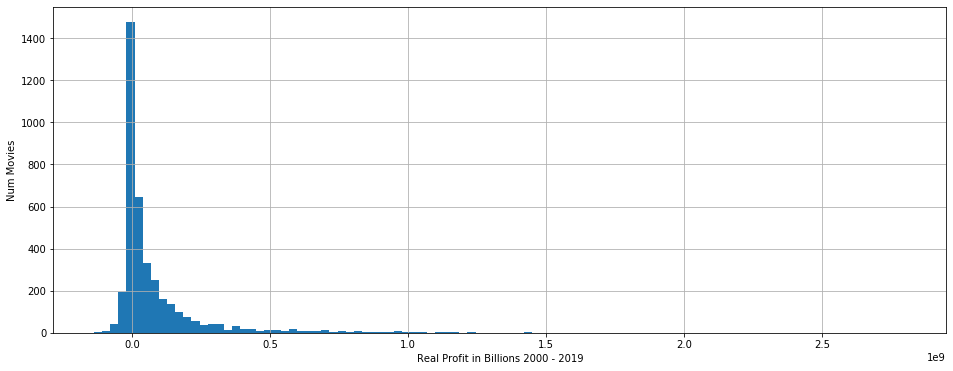

In [101]:
plt.figure(figsize=(16,6))
plt.xlabel('Real Profit in Billions 2000 - 2019')
plt.ylabel('Num Movies')
last_20_years_movie_budgets_df['real_profit'].hist(bins=100);

When looking at the data from the describe() function and the histogram, it's notable that a significant amount of movies lost money or made relatively little.  

The mean real profit may be approx. 82,000,000, the the median is only approx. 16,000,000, so the positive outliers are pulling the mean up, so the median will be a better representation of average for our analysis, since it isn't affected by outliers.

It is not a normal distribution, the right hand side of the curve tapers more slowly, than the left, showing there is a larger distribution of the more profitable movies compared to the unprofitable ones.  And, there are some extremely profitable outliers, where there aren't extremely unprofitable ones.

#### Boxplot of real production budget, domestic gross, worldwide gross and profit

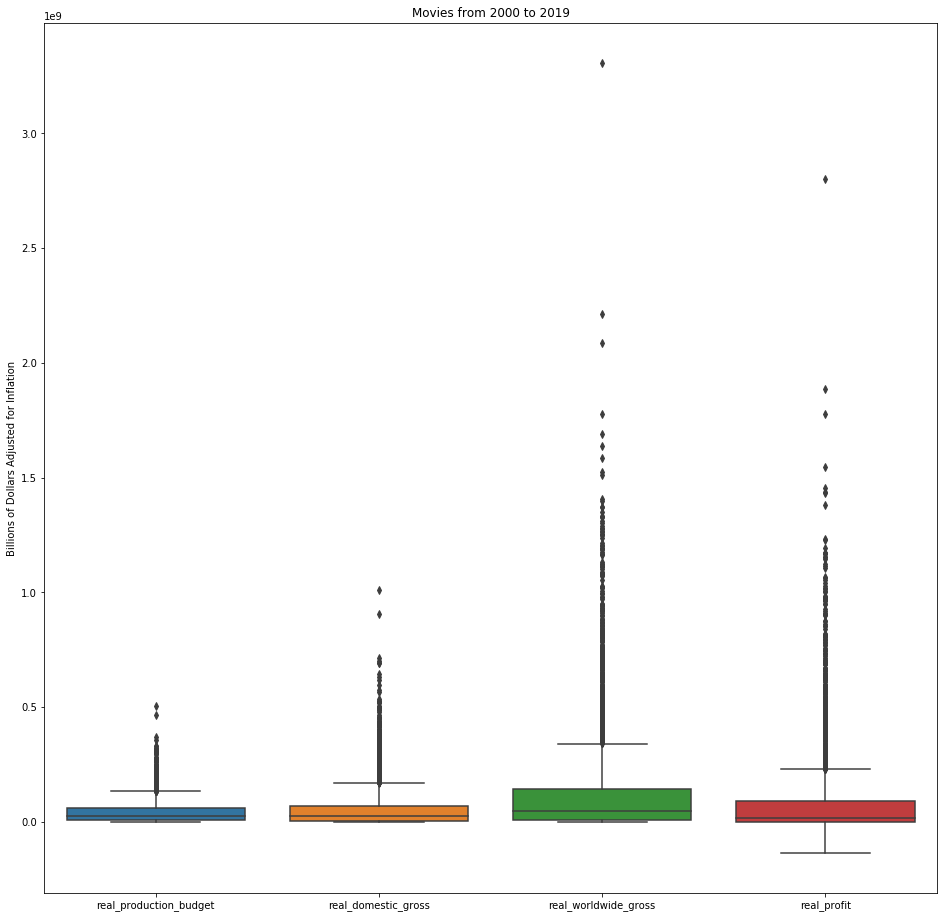

In [102]:
cols_for_boxplot = ['real_production_budget', 'real_domestic_gross', 'real_worldwide_gross', 'real_profit']
plt.figure(figsize=(16,16))
ax = sns.boxplot(data=last_20_years_movie_budgets_df[cols_for_boxplot])
ax.set_title('Movies from 2000 to 2019')
ax.set_ylabel('Billions of Dollars Adjusted for Inflation');

There are some significant positive outliers in this dataset.  However I think they will be relevant to the analysis because they are real data and a result to strive for when producing a "best" movie

#### Boxplot of Real Profit Margin

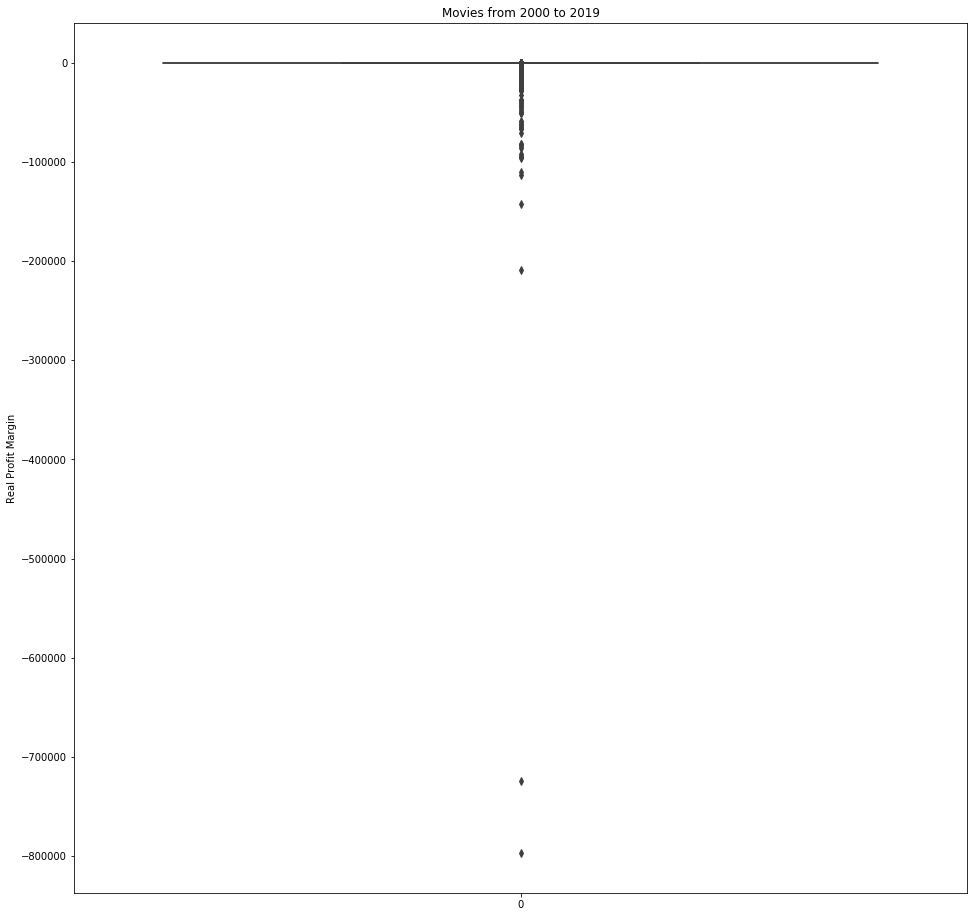

In [103]:
plt.figure(figsize=(16,16))
margin_ax = sns.boxplot(data=last_20_years_movie_budgets_df['real_margin'])
margin_ax.set_title('Movies from 2000 to 2019')
margin_ax.set_ylabel('Real Profit Margin');

This box plot is not really useful.  The negative outliers make it unreadable.

#### Histogram of Real Profit Margin

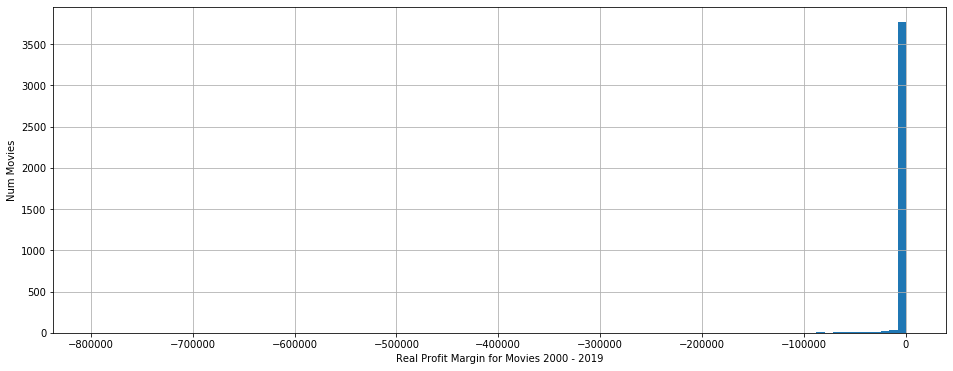

In [104]:
plt.figure(figsize=(16,6))
plt.xlabel('Real Profit Margin for Movies 2000 - 2019')
plt.ylabel('Num Movies')
last_20_years_movie_budgets_df['real_margin'].hist(bins=100);

The histogram plot of the real profit margin is also unreadable, later these visualizations should be limited to a subset of the data and be considered for addition  to the analysis.

#### Look at the top profitable movies

In [105]:
last_20_years_movie_budgets_df.sort_values(by=['real_profit'])[real_cols].tail(20)

,id,release_date,movie,real_production_budget,real_domestic_gross,real_worldwide_gross,real_profit,real_margin
47,48,2013-05-03,Iron Man 3,2.194886e+08,4.488457e+08,1.333824e+09,1.114335e+09,83.544407
342,43,2001-12-19,The Lord of the Rings: The Fellowship of the Ring,1.573496e+08,4.555123e+08,1.280755e+09,1.123405e+09,87.714309
134,35,2017-03-17,Beauty and the Beast,1.668779e+08,5.256803e+08,1.313329e+09,1.146451e+09,87.293517
112,13,2018-06-22,Jurassic World: Fallen Kingdom,1.730804e+08,4.252887e+08,1.329433e+09,1.156353e+09,86.980890
3,4,2015-05-01,Avengers: Age of Ultron,3.565998e+08,4.951040e+08,1.513353e+09,1.156753e+09,76.436443
41,42,2018-02-16,Black Panther,2.036240e+08,7.127445e+08,1.372688e+09,1.169064e+09,85.166046
424,25,2003-05-30,Finding Nemo,1.306074e+08,5.287228e+08,1.301113e+09,1.170505e+09,89.961870
672,73,2015-07-10,Minions,7.981967e+07,3.624738e+08,1.251590e+09,1.171770e+09,93.622538
692,93,2004-05-19,Shrek 2,9.473790e+07,5.971550e+08,1.268146e+09,1.173408e+09,92.529414
426,27,2002-12-18,The Lord of the Rings: The Two Towers,1.335840e+08,4.867985e+08,1.328307e+09,1.194723e+09,89.943293


The most profitable movies all have recognizable names, as would be expected.

#### Look at the movies that had zero profit or lost money

In [106]:
# look at the movies that lost the most money
last_20_years_movie_budgets_df.sort_values(by=['real_profit'])[real_cols].head(20)

,id,release_date,movie,real_production_budget,real_domestic_gross,real_worldwide_gross,real_profit,real_margin
352,53,2001-04-27,Town & Country,1.515753e+08,9.689921e+06,1.496231e+07,-1.366130e+08,-913.047179
404,5,2002-08-16,The Adventures of Pluto Nash,1.421106e+08,6.268644e+06,1.008274e+07,-1.320279e+08,-1309.444263
193,94,2011-03-11,Mars Needs Moms,1.704842e+08,2.431418e+07,4.495073e+07,-1.255335e+08,-279.269072
669,70,2001-02-23,Monkeybone,1.082681e+08,7.809039e+06,7.809039e+06,-1.004590e+08,-1286.445407
607,8,2005-09-02,A Sound of Thunder,1.047238e+08,2.487781e+06,8.247590e+06,-9.647622e+07,-1169.750372
434,35,2004-04-09,The Alamo,1.245127e+08,3.032474e+07,3.236160e+07,-9.215107e+07,-284.754327
477,78,2017-04-21,The Promise,9.386884e+07,8.577826e+06,1.100499e+07,-8.286385e+07,-752.966004
300,1,2010-12-17,How Do You Know?,1.406925e+08,3.542240e+07,5.818593e+07,-8.250655e+07,-141.798122
817,18,2000-10-27,Lucky Numbers,9.650235e+07,1.486765e+07,1.486765e+07,-8.163470e+07,-549.076105
478,79,2010-11-24,The Nutcracker in 3D,1.055194e+08,2.291634e+05,2.399512e+07,-8.152424e+07,-339.753394


In [107]:
num_movies_with_no_profit = len(last_20_years_movie_budgets_df[last_20_years_movie_budgets_df['real_profit'] <= 0])

percent_no_profit = round(num_movies_with_no_profit/len(last_20_years_movie_budgets_df)*100)

print(f'There are {num_movies_with_no_profit} movies with no profit.  {percent_no_profit} percent of the total.')

There are 1229 movies with no profit.  32 percent of the total.


It's notable that 32% of the movies made no profit.  

In the future it may be worth investigating whether the potential ROI of movies is worth the risk compared to other investments.

#### Look at The Overall Correlation Between Real Production_Budget and Real Gross Profit

Is there a correlation between the amount of money spent on production and the net profit?

Since we will be doing multiple visualizations, first I will define a function.

In [108]:
def scatterplot_with_zero_line (x, y, data, xlabel, ylabel, title):
    """Display a scatter plot
    
    Keyword arguments:
    x = data to plot on the x axis
    y = data to plot on the y axis
    data = the data set
    xlabel = the label for the x axis
    ylabel = the label for the y axis
    title = the title for the visualization
    """
    
    # define the display attributes for the plot
    sns.set_context('talk')
    fig = plt.figure(figsize=(18,6))
    
    ax = sns.scatterplot(x=x, y=y, data=data)
    
    # Add a line along y=0 to better illustrate the amount of movies that had a negative profit
    ax.axhline(y=0, ls='--', c='red')

    ax.xaxis.set_label_text(xlabel)
    ax.yaxis.set_label_text(ylabel)
    ax.set_title(title)

    plt.show()

First let's look at the entire dataset

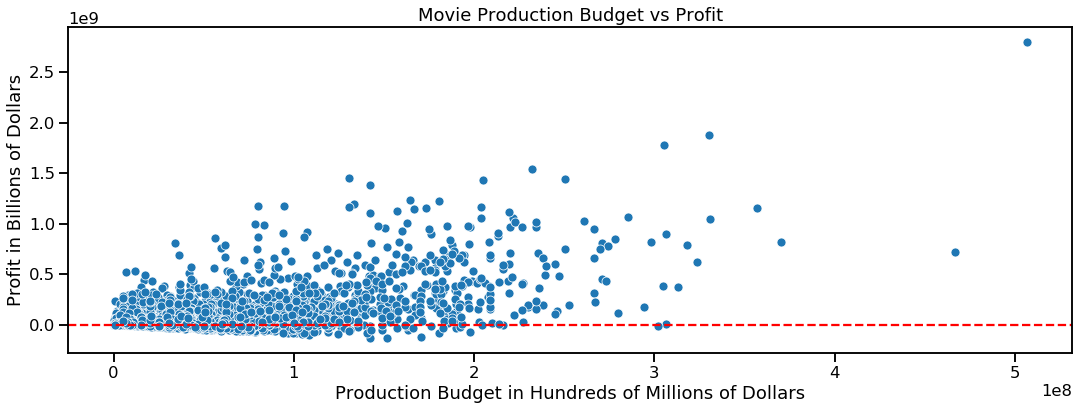

In [109]:
scatterplot_with_zero_line(x='real_production_budget',
                          y='real_profit',
                          data=last_20_years_movie_budgets_df,
                          xlabel='Production Budget in Hundreds of Millions of Dollars',
                          ylabel='Profit in Billions of Dollars',
                          title='Movie Production Budget vs Profit')

there doesn't look like there is much correlation overall but maybe further to the right.  Further analysis is needed.

define a function for doing a lmplot that will add a line showing a best fit line for the data

In [110]:
def lmplot_with_red_line(x, y, data, xlabel, ylabel, title):
    """Display a scatter plot
    
    Keyword arguments:
    x = data to plot on the x axis
    y = data to plot on the y axis
    data = the data set
    xlabel = the label for the x axis
    ylabel = the label for the y axis
    title = the title for the visualization
    """
    # define the display attributes for the plot
    sns.set_context('talk')
    
    plot = sns.lmplot(x=x, y=y, data=data, height=6, aspect=3)
    
    # Add a line along y=0 to better illustrate the amount of movies that had a negative profit
    plot.map(plt.axhline, y=0, ls='--', c='red');

    fig = plot.fig
    ax = fig.axes[0]
    
    ax.xaxis.set_label_text(xlabel)
    ax.yaxis.set_label_text(ylabel)
    ax.set_title(title)

    plt.show()

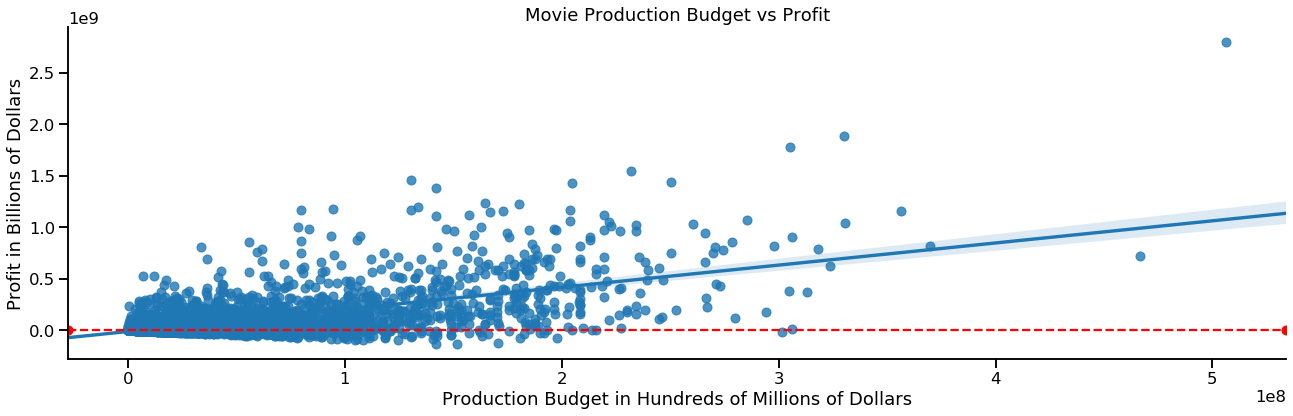

In [111]:
lmplot_with_red_line(x='real_production_budget',
                    y='real_profit',
                    data=last_20_years_movie_budgets_df,
                    xlabel='Production Budget in Hundreds of Millions of Dollars',
                    ylabel='Profit in Billions of Dollars',
                    title='Movie Production Budget vs Profit')

Calculate the correlation for the entire dataset

In [112]:
production = last_20_years_movie_budgets_df.real_production_budget
profit = last_20_years_movie_budgets_df.real_profit
round(production.corr(profit), 2)

0.63

From the above visualization and from the correlation calculation we can see the moderate positive correlation between the amount of money spent in production and the profit a movie will make.

However we know that a third of these movies lose or make no profit and that the left hand side of the visualization doesn't seem to show much of a correlation.  We need to investigate different quantile ranges to see which are better and if there are other factors that can be taken into account to increase the likelihood of a profitable movie.

#### Look at the Correlation Between The Real Pruduction_Budget and Real Gross Profit for Different Quantile Ranges

In [113]:
# define how many quantiles to split the data into
NUM_SPLITS = 10

# sort by real production budget and use its quantile ranges
sorted_by_production_df = last_20_years_movie_budgets_df.sort_values(by=['real_production_budget'])

# define the total number of movies in the dataset
total_movies = len(sorted_by_production_df)

# calculate the size of the splits
split_size = int(total_movies / NUM_SPLITS)

# make a list of the splits
splits = []
for i in range(1, NUM_SPLITS):
    splits.append(i*split_size)
# add the final split point which may be a different size if the split size wasn't a whole number
splits.append(total_movies)

# initialize a list of quantiles
quantiles = []

# create a list of dataframes for each of the quantiles
prev_split = 0 # define the previous split point, in the intial case it will be zero
for split in splits:
    quantiles.append(sorted_by_production_df.iloc[prev_split:split][['real_production_budget', 'real_profit']])
    # update the previous split to be the current split point
    prev_split = split + 1

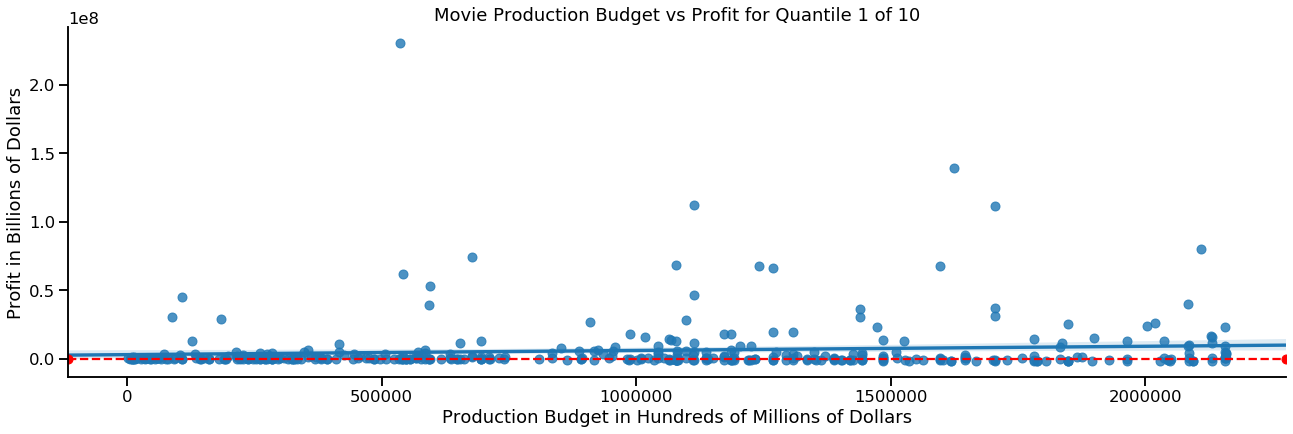

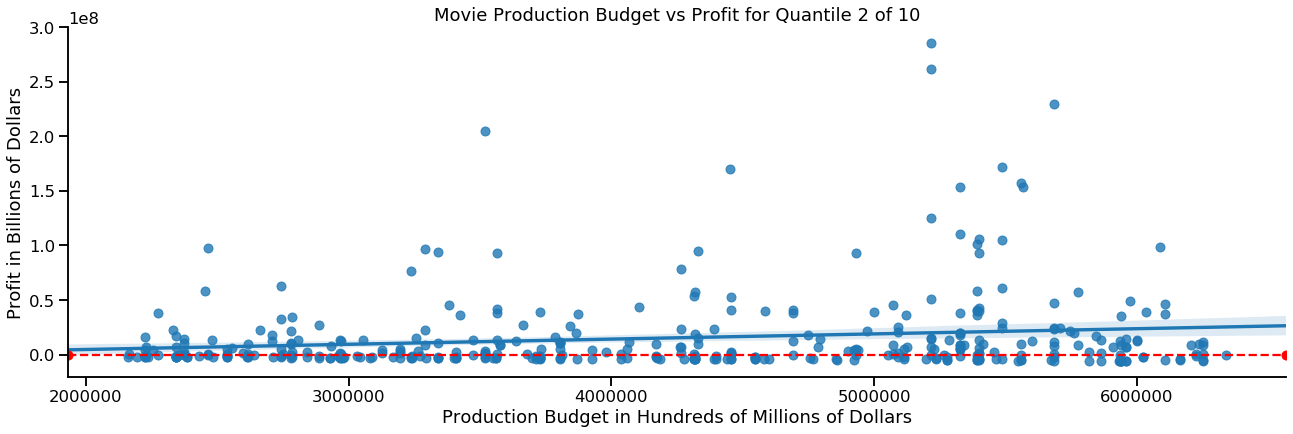

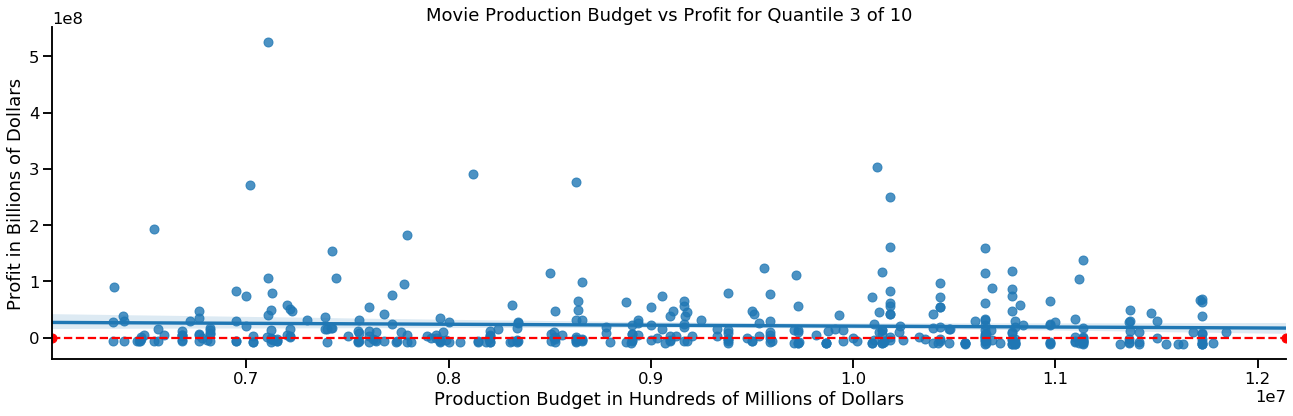

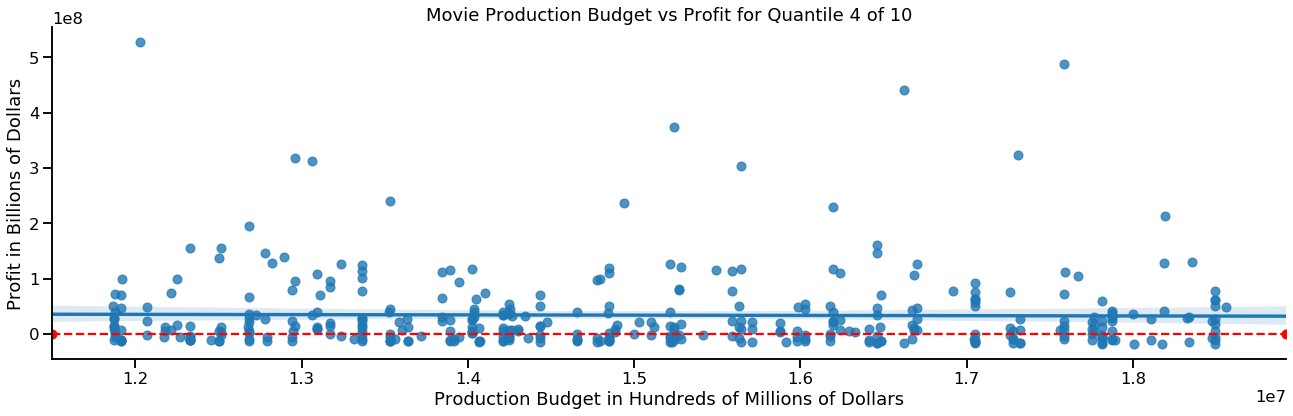

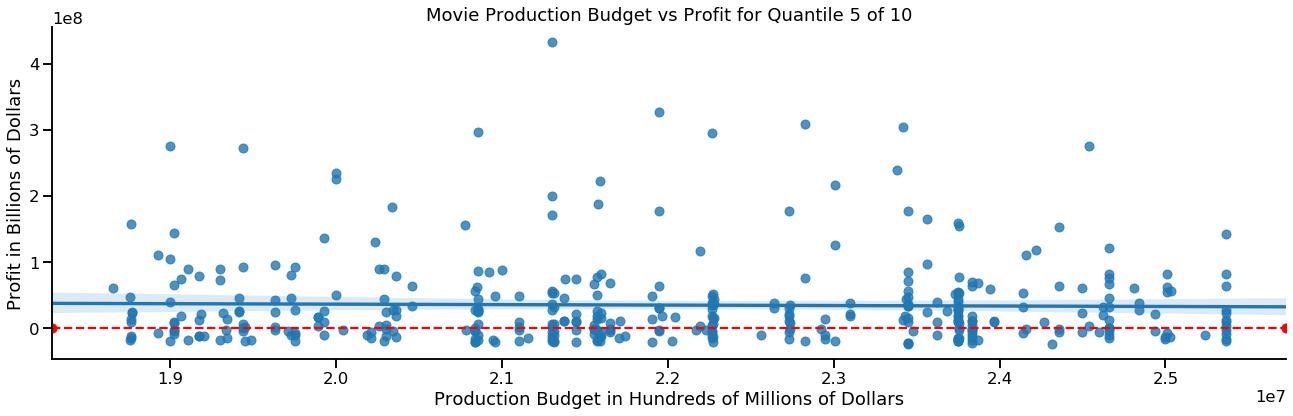

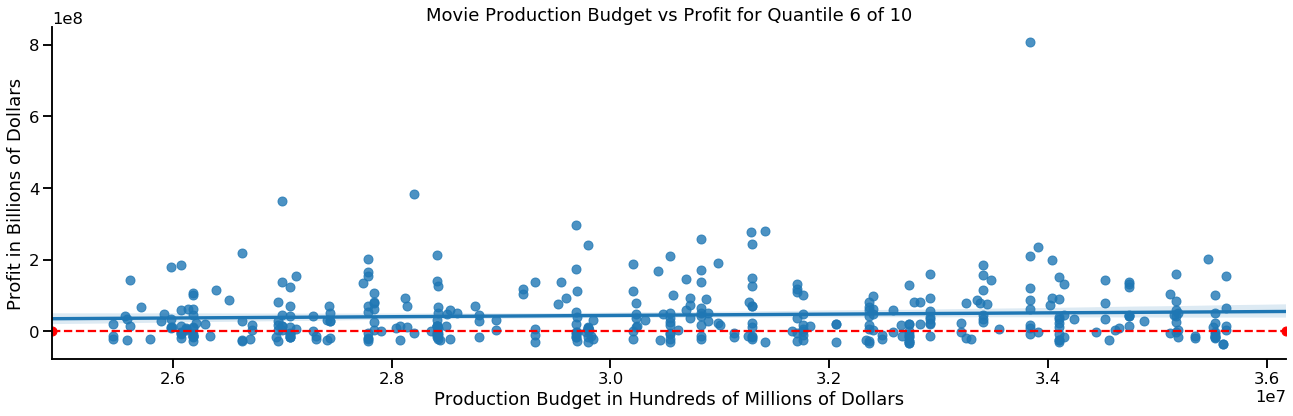

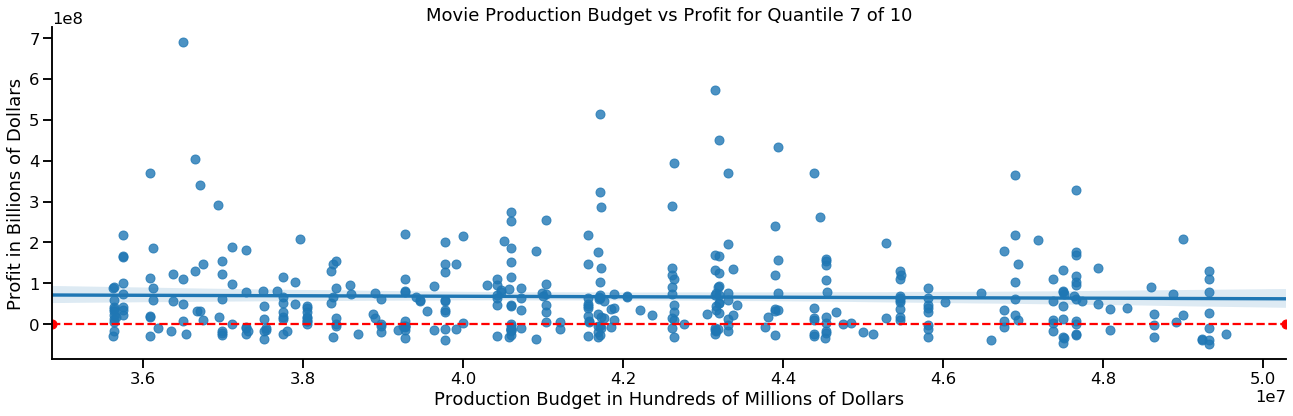

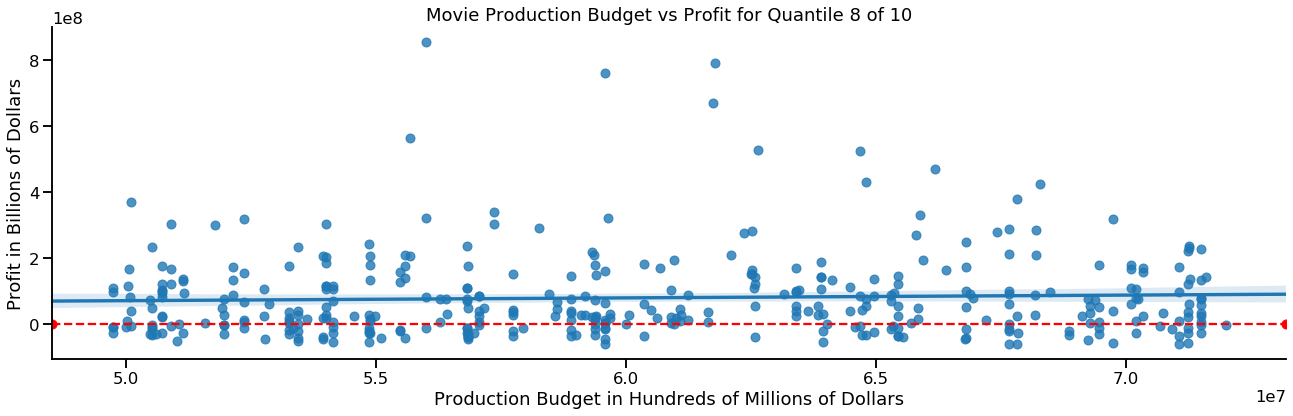

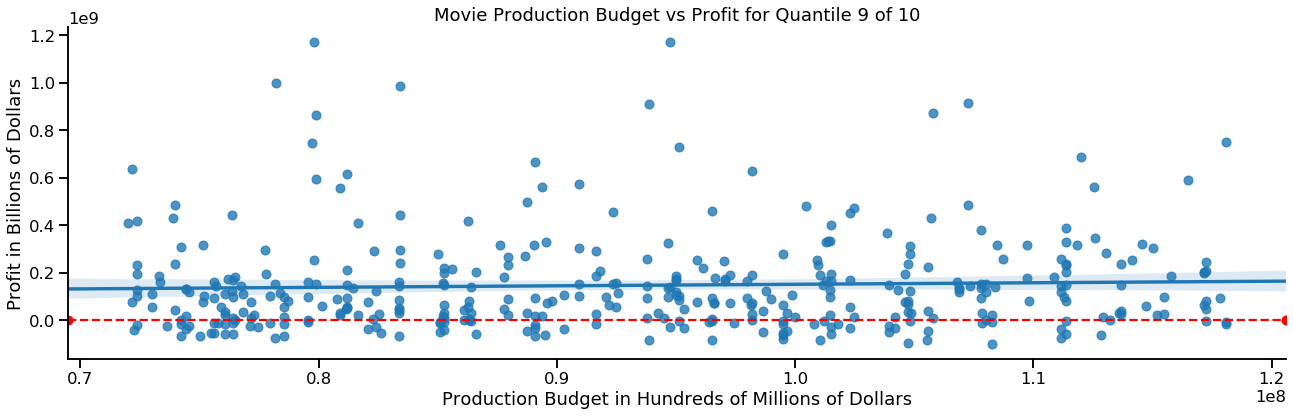

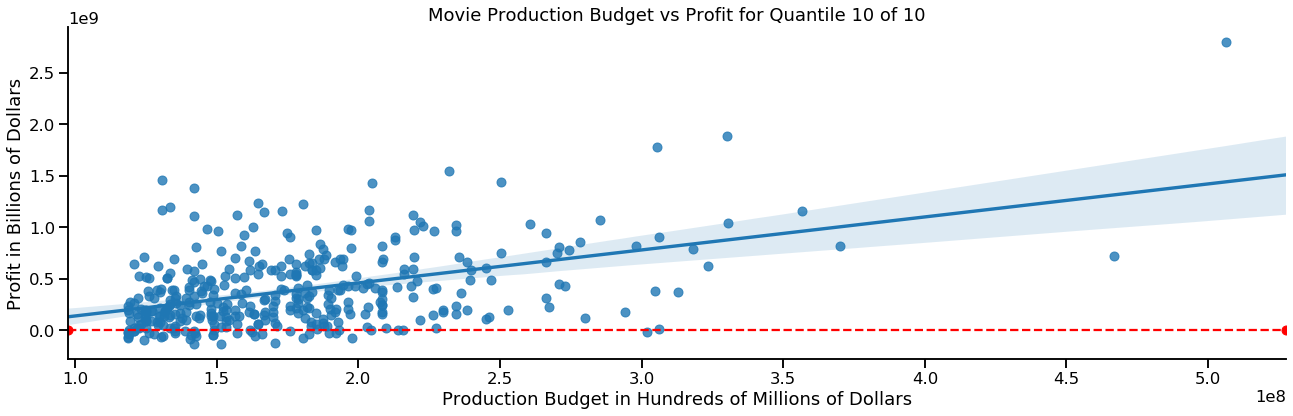

In [114]:
# display lmplots for all the quantiles
for q, data in enumerate(quantiles):
    lmplot_with_red_line(x='real_production_budget',
                         y='real_profit',
                         data=data,
                         xlabel='Production Budget in Hundreds of Millions of Dollars',
                         ylabel='Profit in Billions of Dollars',
                         title=f'Movie Production Budget vs Profit for Quantile {q+1} of {NUM_SPLITS}')

The best fit lines are practically flat for all the quantiles except for the 10th one.

calculate the correlations for all the quantiles

In [115]:
print('Correlation for each quantile')
print('')
for q, data in enumerate(quantiles):
    print(f'Quantile {q + 1}: {round(data.real_production_budget.corr(data.real_profit), 2)}')

Correlation for each quantile

Quantile 1: 0.1
Quantile 2: 0.16
Quantile 3: -0.05
Quantile 4: -0.01
Quantile 5: -0.02
Quantile 6: 0.07
Quantile 7: -0.02
Quantile 8: 0.04
Quantile 9: 0.04
Quantile 10: 0.45


#### Look at the Probability of Profit for each quantile

get the percentage that made money for each quantile

In [116]:
quantile_profit_list = []
quantile_list = []

print('Percentage that had a profit for each quantile')
print('')

for q, data in enumerate(quantiles):
    size_of_quantile = len(data)
    num_with_profit = len(data[data['real_profit'] > 0])
    prob_for_quantile = round(num_with_profit / size_of_quantile * 100)
    quantile_profit_list.append(prob_for_quantile)
    quantile_list.append(q+1)
    print(f'Quantile {q + 1}: {prob_for_quantile}%')

Percentage that had a profit for each quantile

Quantile 1: 53%
Quantile 2: 56%
Quantile 3: 58%
Quantile 4: 65%
Quantile 5: 64%
Quantile 6: 69%
Quantile 7: 74%
Quantile 8: 73%
Quantile 9: 78%
Quantile 10: 90%


Create a visualization of the production budget quantile vs the probability of profit

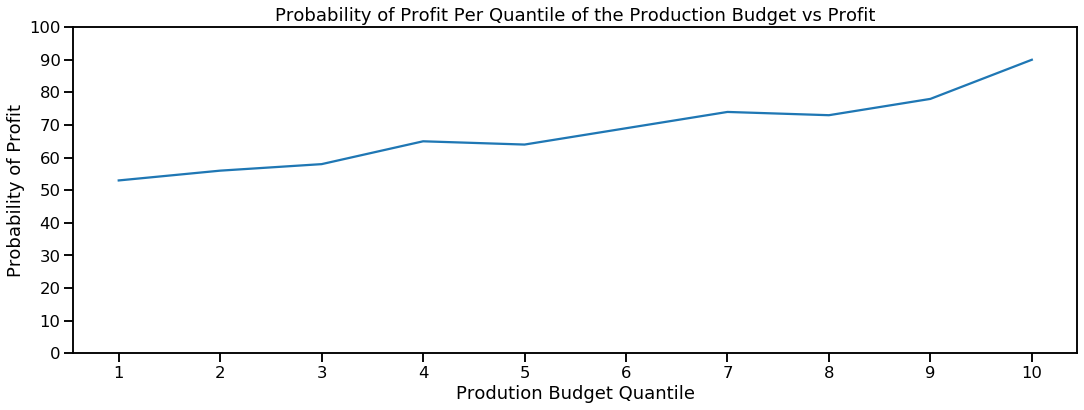

In [117]:
sns.set_context('talk')
fig = plt.figure(figsize=(18,6))
rpb_vs_rp = sns.lineplot(x=quantile_list, y=quantile_profit_list)

ax = fig.axes[0]

ax.xaxis.set_label_text('Prodution Budget Quantile')
ax.xaxis.set_ticks(range(1, 11, 1))
ax.yaxis.set_label_text('Probability of Profit')
ax.yaxis.set_ticks(range(0, 110, 10))
ax.set_title('Probability of Profit Per Quantile of the Production Budget vs Profit')

plt.show()


**Summary**

Looking at the correlations for each quantile, it is only in the 10th quartile, the one with the largest budgets, that we see even a moderate correlation between the amount of money spent on production and the profit.  

The likelihood of seeing a profit on the movies does increase the more money that is spent on production, but the likelihood of a profit must be caused by what the money is spend on not just spending the money on an average production.

What causes the likelihood of a profit, the more money that is spend on production, should be investigated further in future work.

# The Movie Database Genres
Data came from The Movie Database (TMDB) using their API.  The code for retrieving the data is in TMDB_Genres.ipynb

The data was saved in datasets/tmdb_genres.csv

load the data and look at the dataframe

In [118]:
genre_names_df = pd.read_csv('datasets/tmdb_genres.csv', index_col=0)
genre_names_df

,id,movie_name
0,28,Action
1,12,Adventure
2,16,Animation
3,35,Comedy
4,80,Crime
5,99,Documentary
6,18,Drama
7,10751,Family
8,14,Fantasy
9,36,History


# Movie Budgets/Profit Joined with Genres
For the following analysis, the last_20_years_movie_budgets_df and clean_tmdb_movies_df dataframes were merged in Get_Missing_Genres_TMDB.ipynb.  Missing data was gathered from TMDB using their API and saved in a CSV file.

## Read in the data

In [119]:
financials_with_genres_df = pd.read_csv('datasets/financials_with_genres.csv')

In [120]:
financials_with_genres_df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0_x,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,release_year,...,Unnamed: 0.1.1,genre_ids,id_y,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count
0,0,0,3994,95,2000-01-12,My Dog Skip,7000000,34099640,35795319,2000,...,NaN,"[35, 18]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,3752,53,2000-01-12,Next Friday,9500000,57176582,59675307,2000,...,NaN,[35],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,5747,48,2000-01-14,The Terrorist,25000,195043,195043,2000,...,NaN,[99],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,940,41,2000-01-14,Supernova,60000000,14218868,14816494,2000,...,NaN,"[27, 878, 53]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,4060,61,2000-01-21,The Boondock Saints,7000000,30471,411874,2000,...,NaN,"[28, 80, 53]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4000,4000,4000,80,81,2019-05-24,Aladdin,182000000,246734314,619234314,2019,...,NaN,"[12, 35, 14, 10749, 10751]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4001,4001,4001,4012,13,2019-05-24,BrightBurn,7000000,16794432,27989498,2019,...,NaN,"[27, 878, 53]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4002,4002,4002,1370,71,2019-05-31,Rocketman,41000000,57342725,108642725,2019,...,NaN,[18],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4003,4003,4003,124,25,2019-05-31,Godzilla: King of the Monsters,170000000,85576941,299276941,2019,...,NaN,"[28, 878]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Tidy The Data

Drop columns that aren't needed for the current analysis.

I only want to use the columns defined in cols_to_keep for the following analysis.

In [121]:
# define the columns to keep
cols_to_keep = ['release_date_x', 'movie', 'release_year', 'real_production_budget', 'real_domestic_gross',
               'real_worldwide_gross', 'real_profit', 'real_margin', 'genre_ids']

# the columns to remove is all the columns - the columns to keep
cols_to_remove = financials_with_genres_df.columns[~financials_with_genres_df.columns.isin(cols_to_keep)]

print(list(cols_to_remove))

['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0_x', 'id_x', 'production_budget', 'domestic_gross', 'worldwide_gross', 'Unnamed: 0_y', 'Unnamed: 0.1.1', 'id_y', 'original_language', 'original_title', 'popularity', 'release_date_y', 'title', 'vote_average', 'vote_count']


In [122]:
# drop the unneeded columns
financials_with_genres_df = financials_with_genres_df.drop(columns=cols_to_remove)

In [123]:
# look at the resulting dataframe
financials_with_genres_df

,release_date_x,movie,release_year,real_production_budget,real_domestic_gross,real_worldwide_gross,real_profit,real_margin,genre_ids
0,2000-01-12,My Dog Skip,2000,1.039256e+07,5.062608e+07,5.314358e+07,4.275102e+07,80.444370,"[35, 18]"
1,2000-01-12,Next Friday,2000,1.410419e+07,8.488730e+07,8.859704e+07,7.449285e+07,84.080518,[35]
2,2000-01-14,The Terrorist,2000,3.711629e+04,2.895709e+05,2.895709e+05,2.524546e+05,87.182314,[99]
3,2000-01-14,Supernova,2000,8.907909e+07,2.111006e+07,2.199733e+07,-6.708176e+07,-304.954100,"[27, 878, 53]"
4,2000-01-21,The Boondock Saints,2000,1.039256e+07,4.523882e+04,6.114894e+05,-9.781072e+06,-1599.548891,"[28, 80, 53]"
...,...,...,...,...,...,...,...,...,...
4000,2019-05-24,Aladdin,2019,1.820000e+08,2.467343e+08,6.192343e+08,4.372343e+08,70.608864,"[12, 35, 14, 10749, 10751]"
4001,2019-05-24,BrightBurn,2019,7.000000e+06,1.679443e+07,2.798950e+07,2.098950e+07,74.990620,"[27, 878, 53]"
4002,2019-05-31,Rocketman,2019,4.100000e+07,5.734272e+07,1.086427e+08,6.764272e+07,62.261624,[18]
4003,2019-05-31,Godzilla: King of the Monsters,2019,1.700000e+08,8.557694e+07,2.992769e+08,1.292769e+08,43.196426,"[28, 878]"


Drop rows with Nan values

In [124]:
# check how many movies are missing genres, these are rows that genre information couldn't be found for.
financials_with_genres_df.genre_ids.isna().sum()

92

In [125]:
# check if any movies have [] for their genres.  These movies also don't have any available genre info.
len(financials_with_genres_df[financials_with_genres_df.genre_ids == '[]'])

18

In [126]:
# The number of rows with Nan in the genre_id is small so they will be dropped
financials_with_genres_df.dropna(subset=['genre_ids'], inplace=True)

In [127]:
# The number of rows with [] in the genre_id is small so they will be dropped
indexes = financials_with_genres_df[financials_with_genres_df['genre_ids'] == '[]'].index
financials_with_genres_df.drop(indexes, inplace=True)

Confirm the deletions

In [128]:
financials_with_genres_df.genre_ids.isna().sum()

0

In [129]:
len(financials_with_genres_df[financials_with_genres_df.genre_ids == '[]'])

0

In [130]:
# check the length of the updated DF
len(financials_with_genres_df)

3895

Check for Duplicate Rows

In [131]:
financials_with_genres_df[financials_with_genres_df.duplicated()]

,release_date_x,movie,release_year,real_production_budget,real_domestic_gross,real_worldwide_gross,real_profit,real_margin,genre_ids
1863,2008-12-19,The Tale of Despereaux,2008,7.124573e+07,6.041299e+07,1.074413e+08,3.619558e+07,33.688701,"[12, 16, 10751]"
2325,2010-12-29,Blue Valentine,2010,1.172437e+06,1.141707e+07,1.942288e+07,1.825044e+07,93.963627,"[18, 10749]"
2330,2011-01-14,Barney's Version,2011,3.409684e+07,8.527121e+06,1.005354e+07,-2.404330e+07,-239.152627,"[35, 18]"
2371,2011-03-25,The 5th Quarter,2011,6.819369e+06,4.638978e+05,4.638978e+05,-6.355471e+06,-1370.015362,[18]
2570,2012-01-27,The Grey,2012,2.783794e+07,5.743540e+07,9.047240e+07,6.263446e+07,69.230457,"[18, 53, 28, 12]"
...,...,...,...,...,...,...,...,...,...
3821,2017-12-22,The Post,2017,5.214936e+07,8.542425e+07,1.874758e+08,1.353264e+08,72.183415,"[18, 36]"
3823,2017-12-22,Father Figures,2017,2.607468e+07,1.825357e+07,2.194282e+07,-4.131855e+06,-18.830098,[35]
3825,2017-12-22,Downsizing,2017,7.092312e+07,2.550078e+07,5.680418e+07,-1.411895e+07,-24.855473,"[35, 18, 878]"
3847,2018-03-09,Thoroughbreds,2018,5.090599e+06,3.128280e+06,3.245055e+06,-1.845544e+06,-56.872490,"[18, 53]"


Drop the duplicate Rows

In [132]:
financials_with_genres_df.drop_duplicates(inplace=True)

**Arrange the dataframe in a tidy fashion**

Each movie will be listed once for each genre it has.  Information regarding what the main genre or weight of each of the genre's listed for a movie is not available.  I chose to give each of the listed genres equal weight and treat a movie with n genres as n movies with 1 genre each.

For future analysis it may be worth splitting the movies according to their set of genres or according to specific sets of genres.

In [133]:
# initialize the new dataframe
columns = financials_with_genres_df.columns
tidy_financials_with_genres_df = pd.DataFrame(columns=columns)

In [134]:
# iterate throught the current dataframe to create the new dataframe
# this is not very efficient and a more efficient method should be developed in the future
for index, movie in financials_with_genres_df.iterrows():
    genre_list = ast.literal_eval(movie.genre_ids)
    for genre in genre_list:
        movie.genre_ids = genre
        tidy_financials_with_genres_df = tidy_financials_with_genres_df.append(movie, ignore_index=True)
    
# review the new dataframe
tidy_financials_with_genres_df

,release_date_x,movie,release_year,real_production_budget,real_domestic_gross,real_worldwide_gross,real_profit,real_margin,genre_ids
0,2000-01-12,My Dog Skip,2000,1.039256e+07,5.062608e+07,5.314358e+07,4.275102e+07,80.444370,35
1,2000-01-12,My Dog Skip,2000,1.039256e+07,5.062608e+07,5.314358e+07,4.275102e+07,80.444370,18
2,2000-01-12,Next Friday,2000,1.410419e+07,8.488730e+07,8.859704e+07,7.449285e+07,84.080518,35
3,2000-01-14,The Terrorist,2000,3.711629e+04,2.895709e+05,2.895709e+05,2.524546e+05,87.182314,99
4,2000-01-14,Supernova,2000,8.907909e+07,2.111006e+07,2.199733e+07,-6.708176e+07,-304.954100,27
...,...,...,...,...,...,...,...,...,...
9649,2019-05-24,BrightBurn,2019,7.000000e+06,1.679443e+07,2.798950e+07,2.098950e+07,74.990620,53
9650,2019-05-31,Rocketman,2019,4.100000e+07,5.734272e+07,1.086427e+08,6.764272e+07,62.261624,18
9651,2019-05-31,Godzilla: King of the Monsters,2019,1.700000e+08,8.557694e+07,2.992769e+08,1.292769e+08,43.196426,28
9652,2019-05-31,Godzilla: King of the Monsters,2019,1.700000e+08,8.557694e+07,2.992769e+08,1.292769e+08,43.196426,878


Review the info for the most profitable movie in our database

In [135]:
tidy_financials_with_genres_df[tidy_financials_with_genres_df.movie == 'Avatar']

,release_date_x,movie,release_year,real_production_budget,real_domestic_gross,real_worldwide_gross,real_profit,real_margin,genre_ids
5219,2009-12-18,Avatar,2009,5.064591e+08,9.062730e+08,3.308483e+09,2.802024e+09,84.692106,28
5220,2009-12-18,Avatar,2009,5.064591e+08,9.062730e+08,3.308483e+09,2.802024e+09,84.692106,12
5221,2009-12-18,Avatar,2009,5.064591e+08,9.062730e+08,3.308483e+09,2.802024e+09,84.692106,14
5222,2009-12-18,Avatar,2009,5.064591e+08,9.062730e+08,3.308483e+09,2.802024e+09,84.692106,878


The new dataframe lists each movie multiple times according to the number of genres it has as can be seen with the example of *Avatar*

## Create A Dictionary of Dataframes of each genre id

to make further analysis easier, a dictionary of dataframes for each genre will be defined

In [136]:
# define the list of genres
genre_list = tidy_financials_with_genres_df.genre_ids.unique()

genre_list

array([35, 18, 99, 27, 878, 53, 28, 80, 10751, 10749, 9648, 12, 16, 10402,
       36, 10752, 37, 14, 10770], dtype=object)

In [137]:
# initialize the genre dataframe dictionary
genre_df_dict = {}

# populate the dictionary
for genre in genre_list:
    temp_df = tidy_financials_with_genres_df[tidy_financials_with_genres_df.genre_ids == genre]
    genre_df_dict.update({genre: temp_df})

review the dictionary keys to see that they match the list of genres

In [138]:
genre_df_dict.keys()

dict_keys([35, 18, 99, 27, 878, 53, 28, 80, 10751, 10749, 9648, 12, 16, 10402, 36, 10752, 37, 14, 10770])

## Review the Genre Separated Dataframes

### How many movies are there per genre

In [139]:
for key, value in genre_df_dict.items():
    print(f'{genre_names_df[genre_names_df.id == key].movie_name.values[0]} has {len(value)} movies.')

Comedy has 1406 movies.
Drama has 1816 movies.
Documentary has 105 movies.
Horror has 383 movies.
Science Fiction has 411 movies.
Thriller has 968 movies.
Action has 903 movies.
Crime has 537 movies.
Family has 449 movies.
Romance has 670 movies.
Mystery has 300 movies.
Adventure has 651 movies.
Animation has 235 movies.
Music has 124 movies.
History has 161 movies.
War has 111 movies.
Western has 44 movies.
Fantasy has 376 movies.
TV Movie has 4 movies.


unfortunately the number of movies per genre is not close to equal, but that is the dataset that is available.

### Create a summary dataframe with key descriptive values for each genre dataframe

In [140]:
def upper_whisker_quantile(data):
    """
    Return the value at the upper whisker of real_profit in the dataframe
    3rd Quartile + 1.5 * IQR
    """
    # calculate the interquartile range
    iqr = data.real_profit.quantile(0.75) -  data.real_profit.quantile(0.25)
    
    return round(iqr * 1.5 + data.real_profit.quantile(0.75), 2)

a dictionary will be created with all the data and then it will be converted into a dataframe

In [141]:
# intialize the dictionary
genre_data_dict = {}

# populate the dictionary
for genre_id, genre_df in genre_df_dict.items():
    genre_data_dict.update({genre_id: {'genre_name': genre_names_df[genre_names_df.id == genre_id].movie_name.values[0],
                                      'num_movies': len(genre_df),
                                      'mean_profit': round(genre_df.real_profit.mean(), 2),
                                      'median_profit': round(genre_df.real_profit.median(), 2),
                                      'min_profit': round(genre_df.real_profit.min(), 2),
                                      'max_profit': round(genre_df.real_profit.max(), 2),
                                      'num_profitable': len(genre_df[genre_df.real_profit > 0]),
                                      'num_unprofitable': len(genre_df[genre_df.real_profit <= 0]),
                                      'percentage_profitable': round(len(genre_df[genre_df.real_profit > 0]) 
                                                                     / len(genre_df) * 100),
                                      '3rd_quartile_profit': genre_df.real_profit.quantile(0.75),
                                      'upper_whisker_profit': upper_whisker_quantile(genre_df)}})
 

In [142]:
# convert the dictionary to a dataframe    
genre_data_df = pd.DataFrame.from_dict(genre_data_dict, orient='index')
genre_data_df

,genre_name,num_movies,mean_profit,median_profit,min_profit,max_profit,num_profitable,num_unprofitable,percentage_profitable,3rd_quartile_profit,upper_whisker_profit
35,Comedy,1406,7.693912e+07,2.082140e+07,-1.366130e+08,1.173408e+09,980,426,70,9.135429e+07,2.307106e+08
18,Drama,1816,4.507383e+07,6.575772e+06,-8.286385e+07,9.701249e+08,1124,692,62,4.848218e+07,1.272490e+08
99,Documentary,105,2.149554e+07,1.077148e+06,-1.515306e+07,2.911823e+08,62,43,59,1.326406e+07,3.396714e+07
27,Horror,383,5.727507e+07,3.147557e+07,-7.559149e+07,6.909351e+08,285,98,74,8.906247e+07,2.227270e+08
878,Science Fiction,411,1.660679e+08,4.973326e+07,-1.320279e+08,2.802024e+09,298,113,73,2.140208e+08,5.363606e+08
53,Thriller,968,6.811866e+07,2.068311e+07,-9.647622e+07,1.546619e+09,666,302,69,7.991680e+07,2.033416e+08
28,Action,903,1.510640e+08,4.727153e+07,-1.320279e+08,2.802024e+09,657,246,73,1.794915e+08,4.510326e+08
80,Crime,537,5.794613e+07,1.287563e+07,-8.163470e+07,1.433219e+09,360,177,67,6.311104e+07,1.637412e+08
10751,Family,449,1.654140e+08,6.976836e+07,-1.255335e+08,1.231847e+09,363,86,81,2.113802e+08,5.157888e+08
10749,Romance,670,6.010159e+07,1.356415e+07,-1.366130e+08,1.146451e+09,452,218,67,7.628550e+07,1.944277e+08


### Visualizations of Movie Data per Genre

define a function for displaying bar plots of the genre separated movie data

In [143]:
def genre_bar_plot(x, y, data, ylabel, xlabel, title):
    """Display a bar plot
    
    Keyword Arguments:
    x -- data to display on the x axis
    y -- data to display on the y axis
    data -- dataframe
    xlabel -- x axis label
    ylabel -- y axis label
    title -- plot title
    """
    # define the plot display characteristics
    f = plt.figure(figsize=(14, 10))
    sns.set_context('talk')
    color = '#4169E1'
    
    g = sns.barplot(x=x, y=y, data=data, color=color)
    
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    
    plt.show()

#### Percentage of Profitable Movies per Movie Genre

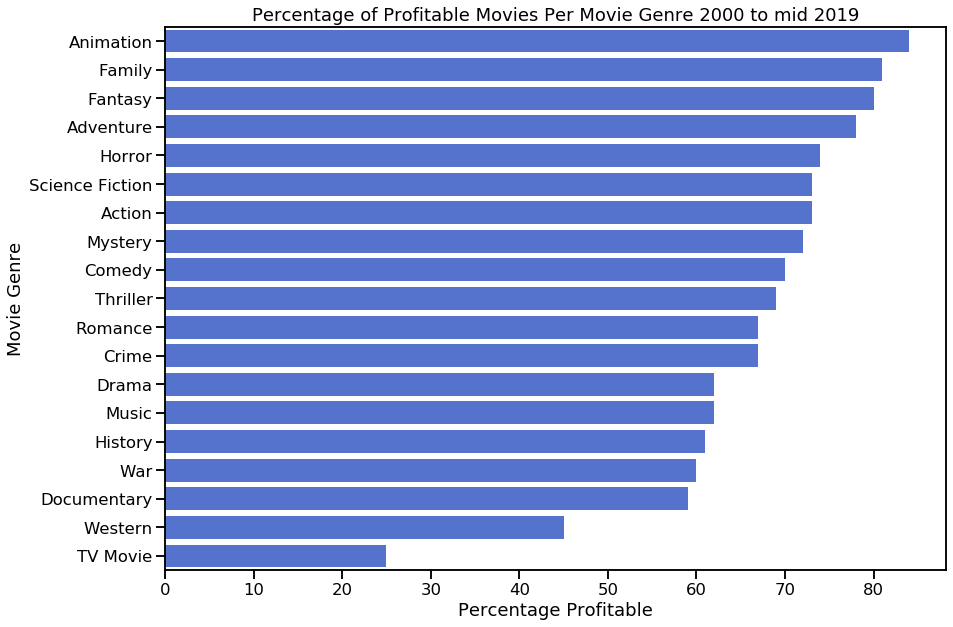

In [144]:
# sort the dataframe so that the genre with the highest percentage of profitable movies will be at the top
genres_sorted_desc_df = genre_data_df.sort_values('percentage_profitable', ascending=False)

# display the plot
genre_bar_plot(x='percentage_profitable',
              y='genre_name',
              data=genres_sorted_desc_df,
              ylabel='Movie Genre',
              xlabel='Percentage Profitable',
              title='Percentage of Profitable Movies Per Movie Genre 2000 to mid 2019')


The movie genre with the higher percentage of profitable movies is Animation.  

Profitable is defined as having a profit of at least $0.01.

#### Mean Profit per Movie Genre

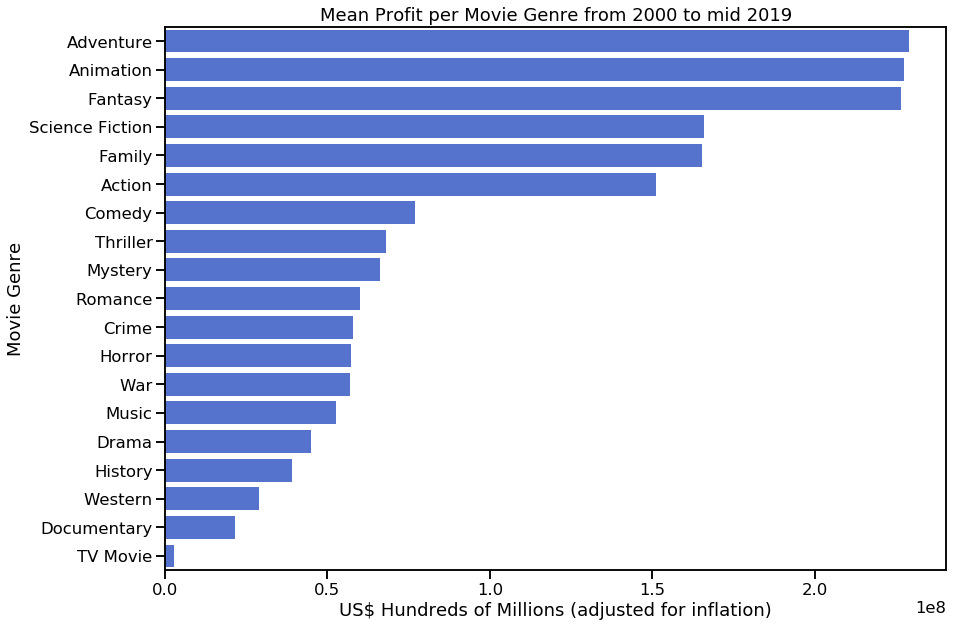

In [145]:
# sort the dataframe so that the most profitable genre by mean will be at the top
genres_sorted_by_mean_profit_desc_df = genre_data_df.sort_values('mean_profit', ascending=False)

# display the plot
genre_bar_plot(x='mean_profit',
              y='genre_name',
              data=genres_sorted_by_mean_profit_desc_df,
              ylabel='Movie Genre',
              xlabel='US$ Hundreds of Millions (adjusted for inflation)',
              title='Mean Profit per Movie Genre from 2000 to mid 2019')

Adventure is the genre with the highest mean profit, closely followed by Animation and Fantasy.

Two things are of note here:
* Animation had the highest percentage of profitable movies, but not the highest mean profit
* Given the extreme positive outliers in the data, mean is not a great measure of the average value of the dataset, and median should be looked at instead.

#### Median Profit per Movie Genre

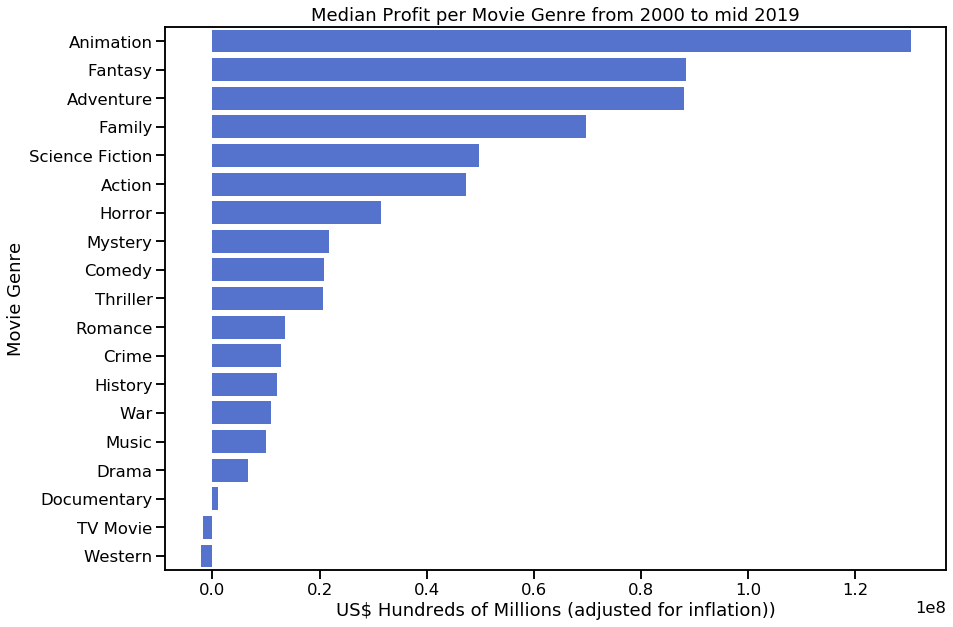

In [146]:
# sort the dataframe so that the most profitable genre by median will be at the top
genres_sorted_by_median_profit_desc_df = genre_data_df.sort_values('median_profit', ascending=False)

genre_bar_plot(x='median_profit',
              y='genre_name',
              data=genres_sorted_by_median_profit_desc_df,
              ylabel='Movie Genre',
              xlabel='US$ Hundreds of Millions (adjusted for inflation))',
              title='Median Profit per Movie Genre from 2000 to mid 2019')

Here, Animation is back at the top and has a higher median profit by far compared to the other genres.

Given the extreme positive outliers, median is a better measure of average, and Animation is by far the best genre in this case.  

This leads to the question, how profitable do the movies have to become before the Animation genre does not have the highest profit?

#### 3rd Quartile Profit per Movie Genre

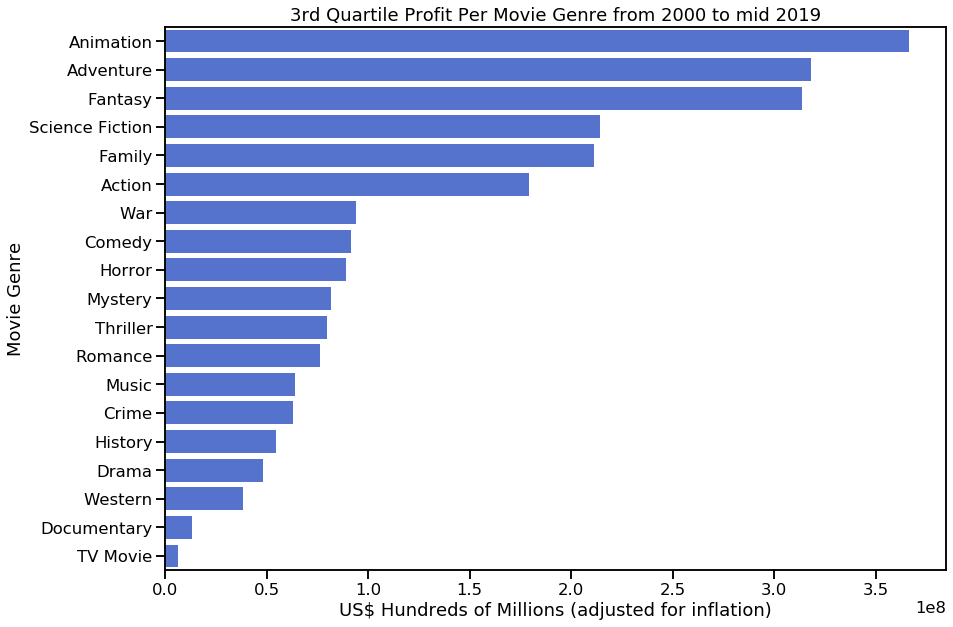

In [147]:
# sort the dataframe so that the most profitable genre by 3rd quartile profit will be at the top
genres_sorted_by_3rd_q_desc_df = genre_data_df.sort_values('3rd_quartile_profit', ascending=False)

# display the plot
genre_bar_plot(x='3rd_quartile_profit',
              y='genre_name',
              data=genres_sorted_by_3rd_q_desc_df,
              ylabel='Movie Genre',
              xlabel='US$ Hundreds of Millions (adjusted for inflation)',
              title='3rd Quartile Profit Per Movie Genre from 2000 to mid 2019')

At the 3rd Quartile, Animation is still the most profitable genre, but Adventure and Fantasy are catching up.

#### Upper Quantile Range

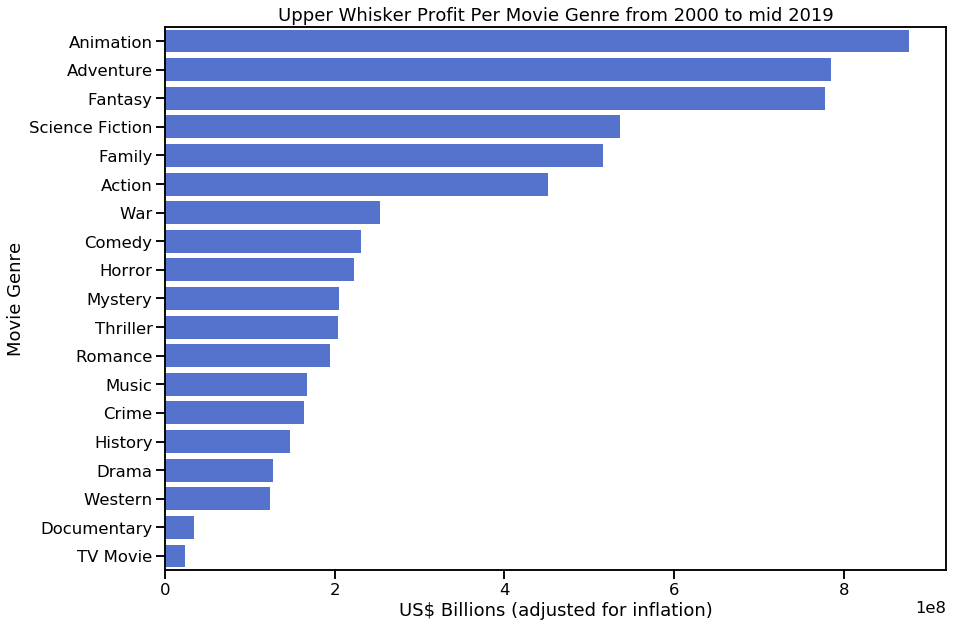

In [148]:
# sort the dataframe so that the most profitable genre by upper quartile range profit will be at the top
genres_sorted_by_upper_whisker_profit_desc_df = genre_data_df.sort_values('upper_whisker_profit', ascending=False)

# display the plot
genre_bar_plot(x='upper_whisker_profit',
              y='genre_name',
              data=genres_sorted_by_upper_whisker_profit_desc_df,
              ylabel='Movie Genre',
              xlabel='US$ Billions (adjusted for inflation)',
              title='Upper Whisker Profit Per Movie Genre from 2000 to mid 2019')

Even at the Upper Quantile Range, Animation is still the most profitable genre with Adventure and Fantasy still more or less tied for second.

#### Maximum Profit per Movie Genre

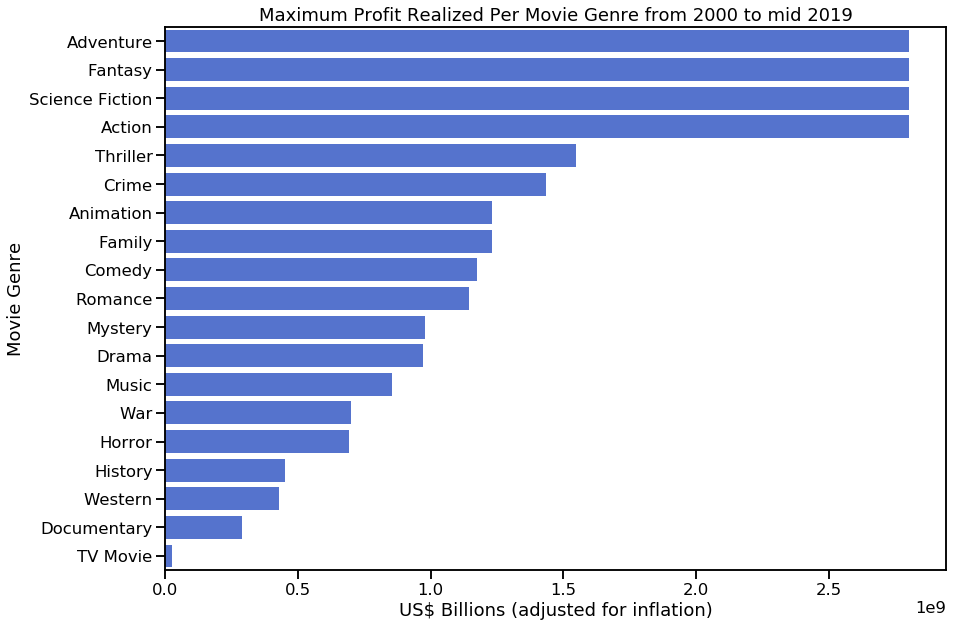

In [149]:
# sort the dataframe so that the most profitable genre by maximum profit will be at the top
genres_sorted_by_max_profit_desc_df = genre_data_df.sort_values('max_profit', ascending=False)

# display the plot
genre_bar_plot(x='max_profit',
              y='genre_name',
              data=genres_sorted_by_max_profit_desc_df,
              ylabel='Movie Genre',
              xlabel='US$ Billions (adjusted for inflation)',
              title='Maximum Profit Realized Per Movie Genre from 2000 to mid 2019')

When looking at maximum profit, that profit made by the extreme outliers, Animation is finally no longer at the top.  

So we found out:
* The Genres Adventure, Fantasy, Science Fiction, Action and Crime were able to have at least one movie in their genre that was more profitable than the most profitable Animation movie.
* That it is extreme outliers in these genres that shifted the mean profit for those genres to the right

#### What are the outlier movies in animation and the genres that had a higher maximum profit than animation?

Genres with a higher max profit than Animation: Adventure, Fantasy, Sci-Fi, Action, Thriller, Crime

Review the movies about the upper whisker profit of each of the above genres

In [150]:
top_genres = ['Animation', 'Adventure', 'Fantasy', 'Science Fiction', 'Action', 'Thriller', 'Crime']
movie_list = []
total_top_movies_count = 0

print(f'The Upper Outlier Movies per Genre')
print('')

for genre_id, genre_df in genre_df_dict.items():
    # if the current genre is in the top_genres list
    if genre_names_df[genre_names_df.id == genre_id].movie_name.values[0] in top_genres:
        # create a temp dataframe of the sorted values for the real_profit category
        tmp_df = genre_df.sort_values('real_profit')
        
        # print the name of the current category
        genre_name = genre_names_df[genre_names_df.id == genre_id].movie_name.values[0]
        print(f'{genre_name}')
        
        # assign the upper whisker profit for the current dataframe
        upper_whisker_profit = genre_data_df[genre_data_df['genre_name'] == genre_name].upper_whisker_profit.values[0]
        print(f'The upper whisker profit is ${upper_whisker_profit:,}')
        
        # the top movies in the genre are the number of movies whose real_profit is
        # greater than its upper_whisker_profit
        top_movies_in_genre = round(len(tmp_df[tmp_df['real_profit'] > upper_whisker_profit]))
        print(f'There are {top_movies_in_genre} outliers for this genre')
        
        # increase the count of total top movies
        total_top_movies_count += top_movies_in_genre
        # print out the top movies for the genre and add the movie names to movie_list
        for i in range(1,top_movies_in_genre+1):
            try :
                print(f"  {tmp_df.iloc[-i].movie} ${round(tmp_df.iloc[-i].real_profit, 2):,}")
                movie_list.append(tmp_df.iloc[-i].movie)
            except:
                None
        print('')

print(f'{len(set(movie_list))} out of {total_top_movies_count} are unique')
print(set(movie_list))

The Upper Outlier Movies per Genre

Science Fiction
The upper whisker profit is $536,360,644.07
There are 39 outliers for this genre
  Avatar $2,802,024,266.18
  Star Wars Episode VII: The Force Awakens $1,884,727,021.99
  Jurassic World $1,546,619,157.97
  The Avengers $1,439,707,103.06
  Black Panther $1,169,064,393.96
  Avengers: Age of Ultron $1,156,753,045.3
  Jurassic World: Fallen Kingdom $1,156,352,735.98
  Iron Man 3 $1,114,335,014.97
  Transformers: Dark of the Moon $1,055,627,542.81
  Star Wars Episode VIII: The Last Jedi $1,042,696,894.06
  Transformers: Age of Extinction $965,494,677.84
  Star Wars Episode III: Revenge of the Sith $960,839,482.32
  Captain America: Civil War $948,107,663.19
  Captain Marvel $948,061,550.0
  Rogue One: A Star Wars Story $904,469,823.2
  The Matrix Reloaded $817,792,456.18
  The Hunger Games: Catching Fire $806,475,702.78
  Inception $792,010,324.87
  Star Wars Episode. II: Attack of the Clones $769,806,980.79
  Venom $750,994,262.48
  Trans

Fantasy
The upper whisker profit is $777,793,902.82
There are 30 outliers for this genre
  Avatar $2,802,024,266.18
  Star Wars Episode VII: The Force Awakens $1,884,727,021.99
  Avengers: Infinity War $1,779,809,982.08
  The Lord of the Rings: The Return of the King $1,455,304,325.82
  Harry Potter and the Deathly Hallows: Part 2 $1,382,846,560.35
  Harry Potter and the Sorcerer's Stone $1,227,106,836.86
  The Lord of the Rings: The Two Towers $1,194,723,452.71
  Shrek 2 $1,173,407,612.51
  Black Panther $1,169,064,393.96
  Beauty and the Beast $1,146,451,122.87
  The Lord of the Rings: The Fellowship of the Ring $1,123,405,340.44
  Harry Potter and the Chamber of Secrets $1,107,361,647.24
  Pirates of the Caribbean: Dead Man's Chest $1,066,779,319.68
  Star Wars Episode VIII: The Last Jedi $1,042,696,894.06
  Aquaman $1,004,776,939.63
  Harry Potter and the Deathly Hallows: Part I $979,491,178.32
  Harry Potter and the Goblet of Fire $977,989,206.53
  Harry Potter and the Order of th

#### What are the movies that had a higher profit than the most profitable Animation movie

In [151]:
top_genres = ['Adventure', 'Fantasy', 'Science Fiction', 'Action', 'Thriller', 'Crime']
movie_list = []
total_top_movies_count = 0

print(f'The Movies That Made More Profit than the Most Profitable Animation Movie')
print('')

max_animation_profit = genre_data_df[genre_data_df.genre_name == 'Animation'].max_profit.values[0]
print(f'The maximum Animation Genre Profit is ${max_animation_profit:,}')
print('')

for genre_id, genre_df in genre_df_dict.items():
    # if the current genre is in the top_genres list
    if genre_names_df[genre_names_df.id == genre_id].movie_name.values[0] in top_genres:
        # create a temp dataframe of the sorted values for the real_profit category
        tmp_df = genre_df.sort_values('real_profit')
        
        # print the name of the current category
        genre_name = genre_names_df[genre_names_df.id == genre_id].movie_name.values[0]
        print(f'{genre_name}')
        
        # the top movies in the genre are the number of movies whose real_profit is
        # greater than its upper_whisker_profit
        top_movies_in_genre = len(tmp_df[round(tmp_df['real_profit'], 2) > max_animation_profit])
        print(f'There are {top_movies_in_genre} outliers for this genre')
        
        # increase the count of total top movies
        total_top_movies_count += top_movies_in_genre
        # print out the top movies for the genre and add the movie names to movie_list
        for i in range(1,top_movies_in_genre+1):
            try :
                print(f"  {tmp_df.iloc[-i].movie} ${round(tmp_df.iloc[-i].real_profit, 2):,}")
                movie_list.append(tmp_df.iloc[-i].movie)
            except:
                None
        print('')

print(f'{len(set(movie_list))} out of {total_top_movies_count} are unique')
print(set(movie_list))

The Movies That Made More Profit than the Most Profitable Animation Movie

The maximum Animation Genre Profit is $1,231,846,605.94

Science Fiction
There are 4 outliers for this genre
  Avatar $2,802,024,266.18
  Star Wars Episode VII: The Force Awakens $1,884,727,021.99
  Jurassic World $1,546,619,157.97
  The Avengers $1,439,707,103.06

Thriller
There are 2 outliers for this genre
  Jurassic World $1,546,619,157.97
  Furious 7 $1,433,219,065.91

Action
There are 7 outliers for this genre
  Avatar $2,802,024,266.18
  Star Wars Episode VII: The Force Awakens $1,884,727,021.99
  Avengers: Infinity War $1,779,809,982.08
  Jurassic World $1,546,619,157.97
  The Lord of the Rings: The Return of the King $1,455,304,325.82
  The Avengers $1,439,707,103.06
  Furious 7 $1,433,219,065.91

Crime
There are 1 outliers for this genre
  Furious 7 $1,433,219,065.91

Adventure
There are 7 outliers for this genre
  Avatar $2,802,024,266.18
  Star Wars Episode VII: The Force Awakens $1,884,727,021.99
  

All the movies that made more profit than the most profitable Animation movie are franchise movies except for Avatar, which is the most profitable movie by far in our dataset.

#### What are the movies that made more profit than the upper whisker of the Animation profit

In [152]:
top_genres = ['Adventure', 'Fantasy', 'Science Fiction', 'Action', 'Thriller', 'Crime']
movie_list = []
total_top_movies_count = 0

print(f'The Movies That Made More Profit than the Upper Whisker of Profit of Animation Movies')
print('')

max_animation_profit = genre_data_df[genre_data_df.genre_name == 'Animation'].upper_whisker_profit.values[0]
print(f'Animation Genre Profit at it Upper Whisker ${max_animation_profit:,}')
print('')

for genre_id, genre_df in genre_df_dict.items():
    # if the current genre is in the top_genres list
    if genre_names_df[genre_names_df.id == genre_id].movie_name.values[0] in top_genres:
        # create a temp dataframe of the sorted values for the real_profit category
        tmp_df = genre_df.sort_values('real_profit')
        
        # print the name of the current category
        genre_name = genre_names_df[genre_names_df.id == genre_id].movie_name.values[0]
        print(f'{genre_name}')
        
        # the top movies in the genre are the number of movies whose real_profit is
        # greater than its upper_whisker_profit
        top_movies_in_genre = len(tmp_df[round(tmp_df['real_profit'], 2) > max_animation_profit])
        print(f'There are {top_movies_in_genre} outliers for this genre')
        
        # increase the count of total top movies
        total_top_movies_count += top_movies_in_genre
        # print out the top movies for the genre and add the movie names to movie_list
        for i in range(1,top_movies_in_genre+1):
            try :
                print(f"  {tmp_df.iloc[-i].movie} ${round(tmp_df.iloc[-i].real_profit, 2):,}")
                movie_list.append(tmp_df.iloc[-i].movie)
            except:
                None
        print('')

print(f'{len(set(movie_list))} out of {total_top_movies_count} are unique')
unique_movies = list(set(movie_list))
unique_movies.sort()
print(unique_movies)

The Movies That Made More Profit than the Upper Whisker of Profit of Animation Movies

Animation Genre Profit at it Upper Whisker $876,930,069.06

Science Fiction
There are 15 outliers for this genre
  Avatar $2,802,024,266.18
  Star Wars Episode VII: The Force Awakens $1,884,727,021.99
  Jurassic World $1,546,619,157.97
  The Avengers $1,439,707,103.06
  Black Panther $1,169,064,393.96
  Avengers: Age of Ultron $1,156,753,045.3
  Jurassic World: Fallen Kingdom $1,156,352,735.98
  Iron Man 3 $1,114,335,014.97
  Transformers: Dark of the Moon $1,055,627,542.81
  Star Wars Episode VIII: The Last Jedi $1,042,696,894.06
  Transformers: Age of Extinction $965,494,677.84
  Star Wars Episode III: Revenge of the Sith $960,839,482.32
  Captain America: Civil War $948,107,663.19
  Captain Marvel $948,061,550.0
  Rogue One: A Star Wars Story $904,469,823.2

Thriller
There are 6 outliers for this genre
  Jurassic World $1,546,619,157.97
  Furious 7 $1,433,219,065.91
  The Fate of the Furious $1,02

##### Findings

The set of movies that is more profitable than the most profitable Animation movie is too small, so further analysis will be on the set of movies with a profit above the upper whisker of profit of the Animation genre. 

We can ignore the crime and thriller genres, there are only 4 and 6 of them respectively and they seem to be a subset of action.

Further analysis should be done on these top movies in Fantasy, Adventure, Action and Science Fiction.

It is notable that of these 115 movies only 44 of them are unique, and 7 of those are also in the Animation category and should be excluded, leaving only 37 movies.

#### Look at the Top Movies, in terms of profits

Create slices of the Fantasy, Adventure, Action and Sci-Fi Genre dataframes to include only the movies that have real profits above the upper whisker profit of the Animation genre.

In [153]:
# set the max animation profit to be its profit at its upper whisker
max_animation_profit = genre_data_df[genre_data_df.genre_name == 'Animation'].upper_whisker_profit.values[0]

# slice the genre dataframes to only contain movies with more profit than max_animation_profit
fantasy_df = genre_df_dict[14][round(genre_df_dict[14]['real_profit'], 2) > max_animation_profit]
adventure_df = genre_df_dict[12][round(genre_df_dict[12]['real_profit'], 2) > max_animation_profit]
action_df = genre_df_dict[28][round(genre_df_dict[28]['real_profit'], 2) > max_animation_profit]
sci_fi_df = genre_df_dict[878][round(genre_df_dict[878]['real_profit'], 2) > max_animation_profit]

combine the above genre dataframes into a new best movies dataframe

In [154]:
best_movies_df = pd.concat([fantasy_df, adventure_df, action_df, sci_fi_df])

In [155]:
best_movies_df

,release_date_x,movie,release_year,real_production_budget,real_domestic_gross,real_worldwide_gross,real_profit,real_margin,genre_ids
883,2001-11-16,Harry Potter and the Sorcerer's Stone,2001,1.804468e+08,4.588711e+08,1.407554e+09,1.227107e+09,87.180113,14
925,2001-12-19,The Lord of the Rings: The Fellowship of the Ring,2001,1.573496e+08,4.555123e+08,1.280755e+09,1.123405e+09,87.714309,14
1113,2002-05-03,Spider-Man,2002,1.975338e+08,5.737096e+08,1.167732e+09,9.701982e+08,83.083982,14
1406,2002-11-15,Harry Potter and the Chamber of Secrets,2002,1.421106e+08,3.726615e+08,1.249472e+09,1.107362e+09,88.626349,14
1466,2002-12-18,The Lord of the Rings: The Two Towers,2002,1.335840e+08,4.867985e+08,1.328307e+09,1.194723e+09,89.943293,14
...,...,...,...,...,...,...,...,...,...
8784,2016-12-16,Rogue One: A Star Wars Story,2016,2.130413e+08,5.668787e+08,1.117511e+09,9.044698e+08,80.936092,878
9168,2017-12-15,Star Wars Episode VIII: The Last Jedi,2017,3.306269e+08,6.468412e+08,1.373324e+09,1.042697e+09,75.925058,878
9229,2018-02-16,Black Panther,2018,2.036240e+08,7.127445e+08,1.372688e+09,1.169064e+09,85.166046,878
9354,2018-06-22,Jurassic World: Fallen Kingdom,2018,1.730804e+08,4.252887e+08,1.329433e+09,1.156353e+09,86.980890,878


drop rows for duplicate movies, for this analysis we don't care about genre only individual movies

In [156]:
best_movies_df.drop_duplicates(subset=['movie', 'release_year'], inplace=True)
best_movies_df

,release_date_x,movie,release_year,real_production_budget,real_domestic_gross,real_worldwide_gross,real_profit,real_margin,genre_ids
883,2001-11-16,Harry Potter and the Sorcerer's Stone,2001,1.804468e+08,4.588711e+08,1.407554e+09,1.227107e+09,87.180113,14
925,2001-12-19,The Lord of the Rings: The Fellowship of the Ring,2001,1.573496e+08,4.555123e+08,1.280755e+09,1.123405e+09,87.714309,14
1113,2002-05-03,Spider-Man,2002,1.975338e+08,5.737096e+08,1.167732e+09,9.701982e+08,83.083982,14
1406,2002-11-15,Harry Potter and the Chamber of Secrets,2002,1.421106e+08,3.726615e+08,1.249472e+09,1.107362e+09,88.626349,14
1466,2002-12-18,The Lord of the Rings: The Two Towers,2002,1.335840e+08,4.867985e+08,1.328307e+09,1.194723e+09,89.943293,14
1964,2003-12-17,The Lord of the Rings: The Return of the King,2003,1.306074e+08,5.249943e+08,1.585912e+09,1.455304e+09,91.764524,14
2157,2004-05-19,Shrek 2,2004,9.473790e+07,5.971550e+08,1.268146e+09,1.173408e+09,92.529414,14
2171,2004-06-04,Harry Potter and the Prisoner of Azkaban,2004,1.759418e+08,3.380218e+08,1.078533e+09,9.025915e+08,83.686936,14
2946,2005-11-18,Harry Potter and the Goblet of Fire,2005,1.963571e+08,3.798879e+08,1.174346e+09,9.779892e+08,83.279452,14
3301,2006-07-07,Pirates of the Caribbean: Dead Man's Chest,2006,2.853315e+08,5.368237e+08,1.352111e+09,1.066779e+09,78.897330,14


Drop the movies that are also Animation

In [157]:
# get the list of animation movies in the best movies dataframe
index_of_animations = best_movies_df[best_movies_df['movie'].isin(genre_df_dict[16]['movie'])].index

In [158]:
# drop the animation movies
best_movies_df.drop(index_of_animations, inplace=True)

In [159]:
# look at the basics of the remaining data
best_movies_df.describe()

,real_production_budget,real_domestic_gross,real_worldwide_gross,real_profit,real_margin
count,3.700000e+01,3.700000e+01,3.700000e+01,3.700000e+01,37.000000
mean,2.190915e+08,4.962697e+08,1.397936e+09,1.178845e+09,84.181083
std,7.879082e+07,1.651674e+08,4.158769e+08,3.642141e+08,4.178940
min,9.386884e+07,2.354697e+08,1.005957e+09,9.013248e+08,74.641268
25%,1.668779e+08,3.807690e+08,1.174346e+09,9.701249e+08,81.536856
50%,2.049424e+08,4.555123e+08,1.280755e+09,1.055628e+09,84.692106
75%,2.505415e+08,5.668787e+08,1.407554e+09,1.194723e+09,86.985018
max,5.064591e+08,1.010325e+09,3.308483e+09,2.802024e+09,91.764524


In [160]:
print('For the Best movies:')
print('')
print(f'The Minimum production budget is ${round(best_movies_df.real_production_budget.min(),2):,}')
print(f'The Mean production budget is ${round(best_movies_df.real_production_budget.mean(),2):,}')
print(f'The Median production budget is ${round(best_movies_df.real_production_budget.median(),2):,}')
print('')
print(f'The Minimum profit is ${round(best_movies_df.real_profit.min(),2):,}')
print(f'The Minimum profit margin is {round(best_movies_df.real_margin.min(),2):,}%')

For the Best movies:

The Minimum production budget is $93,868,839.75
The Mean production budget is $219,091,489.4
The Median production budget is $204,942,388.1

The Minimum profit is $901,324,824.4
The Minimum profit margin is 74.64%


#### How are the best movies spread out by month?

In [161]:
# convert release_date_x to datetime
best_movies_df['release_date_x'] = pd.to_datetime(best_movies_df['release_date_x'])

# add a release month column to the dataframe
best_movies_df['release_month'] = best_movies_df.release_date_x.apply(lambda x: x.month)

What months were the movies released in?

In [162]:
best_movies_df['release_month'].value_counts()

12    9
5     6
11    5
7     5
6     5
4     3
3     3
2     1
Name: release_month, dtype: int64

Plot the release months

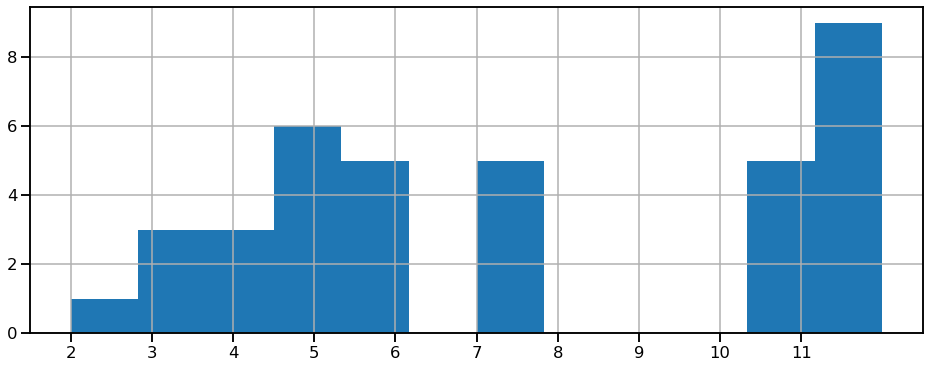

In [163]:
plt.figure(figsize=(16,6))
plt.xticks(np.arange(1, 12, 1))
best_movies_df.release_month.hist(bins=12)

There isn't much data in this dataset, but there still seems to be some significance that there were no best movies during certain months, and that going into the winter holiday season there were the most.

#### How are the best movies spread out by year?

In [164]:
# convert release year to an int
best_movies_df.release_year = best_movies_df.release_year.astype('int64')

In [165]:
best_movies_df.release_year.value_counts()

2017    4
2015    4
2018    4
2002    3
2012    3
2010    2
2011    2
2005    2
2001    2
2016    2
2013    1
2009    1
2008    1
2007    1
2006    1
2014    1
2004    1
2003    1
2019    1
Name: release_year, dtype: int64

In [166]:
len(best_movies_df.release_year.unique())

19

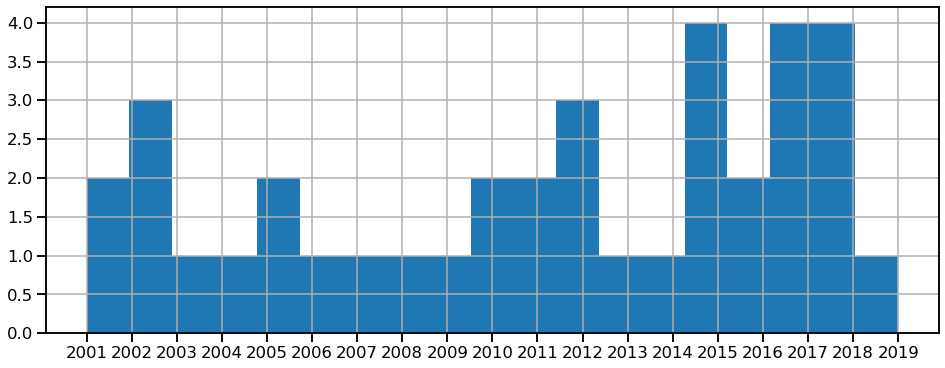

In [167]:
plt.figure(figsize=(16,6))
plt.xticks(np.arange(2001, 2020, 1))
best_movies_df.release_year.hist(bins=19)

A typical year has had 1-2 of these outlier movies, the the last few years have seen 3-4.  The data for 2019 ended mid year, excluding the holiday season, so it may have been able to have additional best movies.

#### Look at the most profitable movies in terms of being a franchise

While reviewing the best movies it looked like a lot of them were part of movie franchises.  What is the actual percentage?

Display the movies sorted by title, to help identify the franchises.  

Because the dataset is small, the identification of the franchises will not be automated, instead it will be accomplished by looking for similar titles and searching for the movie info on Google.

In [168]:
best_movies_df.sort_values(['movie'])[['movie', 'release_year', 'release_month', 'real_profit']]

,movie,release_year,release_month,real_profit
5318,Alice in Wonderland,2010,3,9.678366e+08
9533,Aquaman,2018,12,1.004777e+09
5221,Avatar,2009,12,2.802024e+09
7983,Avengers: Age of Ultron,2015,5,1.156753e+09
9301,Avengers: Infinity War,2018,4,1.779810e+09
8893,Beauty and the Beast,2017,3,1.146451e+09
9228,Black Panther,2018,2,1.169064e+09
8514,Captain America: Civil War,2016,5,9.481077e+08
9592,Captain Marvel,2019,3,9.480616e+08
7947,Furious 7,2015,4,1.433219e+09


In [169]:
# Define a list of strings that will be used to identify the movies that are franchises
franchises = ['Lord of the Rings', 'Star Wars', 'Harry Potter', 'Dark Knight', 'Avengers', 'Furious',
             'Iron Man', 'Spider-Man', 'Transformers', 'Pirates of the Caribbean', 'Captain America',
             'Jurassic', 'Skyfall']

# add the franchise column, checking to see if the movie title is an existing franchise
best_movies_df['franchise'] = best_movies_df['movie'].apply(lambda x: any(franchise in x for franchise in franchises))

Display the updated dataframe

In [170]:
best_movies_df.sort_values(['movie'])[['movie', 'release_year', 'release_month', 'real_profit', 'franchise']]

,movie,release_year,release_month,real_profit,franchise
5318,Alice in Wonderland,2010,3,9.678366e+08,False
9533,Aquaman,2018,12,1.004777e+09,False
5221,Avatar,2009,12,2.802024e+09,False
7983,Avengers: Age of Ultron,2015,5,1.156753e+09,True
9301,Avengers: Infinity War,2018,4,1.779810e+09,True
8893,Beauty and the Beast,2017,3,1.146451e+09,False
9228,Black Panther,2018,2,1.169064e+09,False
8514,Captain America: Civil War,2016,5,9.481077e+08,True
9592,Captain Marvel,2019,3,9.480616e+08,False
7947,Furious 7,2015,4,1.433219e+09,True


In [171]:
best_movies_df.franchise.value_counts(normalize=True)

True     0.810811
False    0.189189
Name: franchise, dtype: float64

Of the most profitable movies, 81% of them are franchises.

That is a very high percentage and likely one of the causes each of the movies profitability.  Of the 19% of the movies that are not franchises, they would seem to be perfect franchise opportunities.

Further analysis should be done to look into other causes of the high profitability of this type of movie.

# Summary of Findings

**What types of films are currently doing the best at the box office and what are some actionable insights from that data that can be used when starting a new movie studio?**

I based my analysis around what types of movies to choose in order to have the best return on investment and probability of profitability.

Return on investment would be finding the movie types that would provide the highest profits.

Probability of Profitability would be finding what movie types would provide the highest probability of making at least $0.01.

The commercial movie industry has been around since the late 19th century, but the entertainment habits and tastes for current movie watchers are what I was interested in, so I limited the movie data to movies made in the year 2000 up to mid 2019 (the most recent data available).

I started by adjusting all the historical monetary values for inflation, so that there was a standard buying power per dollar across the dataset. 

The first question I wanted to answer was, "If we built it, will they come?".  Meaning, are movies profitable by default, and is profit correlated to the production budget.

In the first case, I found that no, movies are not profitable by default; in fact, 32% of the movies in the dataset made zero profit or lost money?

Looking at the correlation between profit and production budget is a more complicated story.  When looking at all the data in the dataset, the correlation is 0.63, which is a solid moderate correlation, but when looking at the visualization of profit vs. production budget, it doesn't look like the data has that much of a correlation. When looking at the bulk of the dataset it looks like a rectangle.  I then split up the data into 10 quantiles to check the correlation in each.  I found that there was essentially no correlation between the two variables until the 10th quantile, where it had a correlation of 0.45.  Therefore it is only for the movies with the very highest production budgets that there is even a moderate correlation between the two.

Next, I looked at the probability of profit for each quantile of production budget.  I found that there is a positive linear relationship between the amount of money spent on the production budget of a movie and the probability of profit.  It starts at 53% for the 1st quantile and goes up to 90% for the 10th quantile.

From the standpoint of running a movie studio it is reassuring to know that the more money that is spent on production the less likely the movie will lose money, but it isn't on its own enough information to run a for profit studio.  That studio will also want to know what types of movies to make to have a good return on the investment in the movies it produces. 

I next looked at what genres of movies are the most profitable.

First, I looked at the percentage of movies per genre that are profitable and found that Animation had the highest percentage of movies that were profitable.

I next wanted to know about the profitability of each genre and how that relates to the percentage that are profitable.

It turns out here that in most cases Animation is the most profitable.  It has the highest average profit per movie.  Given the amount of extreme outliers in our dataset, median was used to illustrate the average.

I then looked at the 3rd Quantile of profit per genre, followed by the upper whisker of profit for genre and in both cases Animation was on top.

It was only when I looked at the maximum profit per genre, did other genres show more profit than Animation.  Those genres were: Adventure, Fantasy, Sci-Fi, Action, Thriller, and Crime.  

In these genres there were 37 movies that were more profitable than the upper whisker of profit in the Animation genre, and the first noticeable attribute of them was that so many were part of movie franchises.  After researching each movie, I found that 81% of them were part of a movie franchise.



**From the analysis done so far I have the following recommendations.**

Focus on the Animation genre, it is the the most likely to be profitable and that profit will likely be higher than the other genres.

Keep an eye out for Action/Adventure/Fantasy/Sci-Fi movies that have franchise potential because they have the potential to make the highest profits although there is more financial risk involved.

**Future Work**

Further analyze movies in the Animation genre to find other attributes that would help increase the probability of profit and return on investment

Further analyze the movies in the Action/Adventure/Fantasy/Sci-Fi genres to find out what could help give the movie extreme profits besides the movie being part of a franchise.

Analyze how the production budget could be split up according the attributes found in the two above suggestions for future work.

Include an analysis of the marketing side of the movie industry.